# Analysis of Growth and Present Insights to the Telangana Government

#### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd


import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

#### Load Datasets

In [ ]:
fact_stamps = pd.read_csv("/content/fact_stamps.csv")
fact_transport = pd.read_csv("/content/fact_transport.csv")
dim_districts = pd.read_csv("/content/dim_districts.csv")
dim_date = pd.read_csv("/content/dim_date.csv")
ipass = pd.read_csv("/content/fact_TS_iPASS.csv")

gdf = gpd.read_file('/content/telangana_district_map.json')

##### ***The below table contains information about districts.***

In [ ]:
display(dim_districts.head())
print("SIZE ",dim_districts.shape)

dist_code              district
0      19_1              Adilabad
1      22_2  Bhadradri Kothagudem
2      21_1           Hanumakonda
3      16_1             Hyderabad
4      20_2               Jagtial

SIZE  (33, 2)


##### ***This below table contains the dates at the monthly level.***

In [ ]:
display(dim_date.head())
print("SIZE ",dim_date.shape)

month  Mmm quarter  fiscal_year
0  2019-04-01  Apr      Q1         2019
1  2019-05-01  May      Q1         2019
2  2019-06-01  Jun      Q1         2019
3  2019-07-01  Jul      Q2         2019
4  2019-08-01  Aug      Q2         2019

SIZE  (48, 4)


##### ***The below table provides data on the revenue generated from document registrations and estamp challan payments aggregated at the district and monthly level.***

In [ ]:
display(fact_stamps.head())
print("SIZE ",fact_stamps.shape)

dist_code       month  documents_registered_cnt  documents_registered_rev  \
0      14_1  2019-04-01                      4533                  59236363   
1      17_3  2019-04-01                      4151                  41508762   
2      20_3  2019-04-01                      2116                  23674170   
3      21_5  2019-04-01                      1089                  15915285   
4      23_1  2019-04-01                      6133                  82593256   

   estamps_challans_cnt  estamps_challans_rev  
0                     0                     0  
1                     0                     0  
2                     0                     0  
3                     0                     0  
4                     0                     0

SIZE  (1504, 6)


##### ***The below table provides information about the individual vehicle sales data from the RTA(Regional Transport Authority) of the state of Telangana categorized by fuel type,***
*vehicle class, seating capacity, and other general categories aggregated at the district and monthly level.*

In [ ]:
display(fact_transport.head())
print("SIZE ",fact_transport.shape)

dist_code       month  fuel_type_petrol  fuel_type_diesel  \
0      15_1  2019-04-01             17910              3011   
1      18_2  2019-04-01              3066               306   
2      20_3  2019-04-01              1577               215   
3      21_3  2019-04-01              1961               281   
4      21_7  2019-04-01              1552               309   

   fuel_type_electric  fuel_type_others  vehicleClass_MotorCycle  \
0                  76                22                    15308   
1                   6                 0                     2995   
2                   0                 0                     1546   
3                   2                 0                     1939   
4                   0                 0                     1512   

   vehicleClass_MotorCar  vehicleClass_AutoRickshaw  vehicleClass_Agriculture  \
0                   4429                          0                         4   
1                    142                         49                        64   
2                     79                         29                        21   
3                     72                         72                        48   
4                     76                         69                       109   

   vehicleClass_others  seatCapacity_1_to_3  seatCapacity_4_to_6  \
0                 1278                16110                 4182   
1                  128                 3156                  189   
2                  117                 1683                  104   
3                  113                 2082                  146   
4                   95                 1696                  145   

   seatCapacity_above_6  Brand_new_vehicles  Pre-owned_vehicles  \
0                   717               19542                1477   
1                    33                3322                  56   
2                     5                1751                  41   
3                    16                2209                  35   
4                    20                1820                  41   

   category_Non-Transport  category_Transport  
0                   19856                1163  
1                    3203                 175  
2                    1648                 144  
3                    2075                 169  
4                    1701                 160

SIZE  (1440, 18)


##### ***The TS-iPASS dataset in Telangana comprises data concerning units or businesses established within the state under the "Industrial Project Approval and Self-Certification System" (iPASS).***
*This government initiative aims to foster industrial growth and investment by streamlining project approvals and enabling self-certification for businesses.*

In [ ]:
display(ipass.head())
print("SIZE ",ipass.shape)

dist_code       month                              sector  investment in cr  \
0      14_1  01-04-2019                         Engineering            2.3200   
1      19_1  01-04-2019                         Engineering            0.6250   
2      20_3  01-04-2019                    Wood and Leather            0.2000   
3      20_3  01-04-2019                            Textiles            0.2675   
4      21_5  01-04-2019  Electrical and Electronic Products            0.1200   

   number_of_employees  
0                   15  
1                   13  
2                    8  
3                   27  
4                    5

SIZE  (5753, 5)


### Data Fusion

In [ ]:
## Merging the two DataFrames based on the 'dist_code' column
dfs = pd.merge(dim_districts, fact_stamps, on=['dist_code'])

In [ ]:
dfs['date'] = pd.to_datetime(dfs['month'])
dfs['year'] = dfs['date'].dt.year
dfs = dfs.drop(columns=['month'])
# dfs['month'] = dfs['date'].dt.month
dfs['month'] = dfs['date'].dt.strftime('%B')

In [ ]:
display(dfs.sample(5))
print("SIZE ",dfs.shape)

dist_code               district  documents_registered_cnt  \
873       23_1               Nalgonda                      6327   
1145      15_1             Rangareddy                      3140   
1204      17_2             Sangareddy                      5494   
504       19_4  Kumurambheem Asifabad                       334   
1179      17_2             Sangareddy                      9685   

      documents_registered_rev  estamps_challans_cnt  estamps_challans_rev  \
873                  135986699                  6743             148708243   
1145                 378347267                     0                     0   
1204                 573226514                  5800             582851656   
504                   10078056                   384              10844861   
1179                 413909852                     0                     0   

           date  year      month  
873  2021-07-01  2021       July  
1145 2020-09-01  2020  September  
1204 2021-10-01  2021    October  
504  2022-03-01  2022      March  
1179 2019-08-01  2019     August

SIZE  (1504, 9)


# Data Exploration

# **Stamp Registration**

**How does the revenue generated from document registration vary
across districts in Telangana?**

In [ ]:
yd = dfs.groupby(['year','district']).sum().sort_values(ascending=True, by='year').reset_index()

fig = px.line(yd, x="year", y="documents_registered_rev", color='district')
fig.update_layout(title='Distribution of Revenue generated from Document Registration across Districts')
fig.show()

*Inference: The revenue of the districts is disparate, meaning that it is not uniform and there is a wide range of values. Some districts have much higher revenue than others, while others have much lower revenue. This disparity in revenue can be due to a number of factors, such as the size of the district, the population density, the economic activity, and the tax base.*

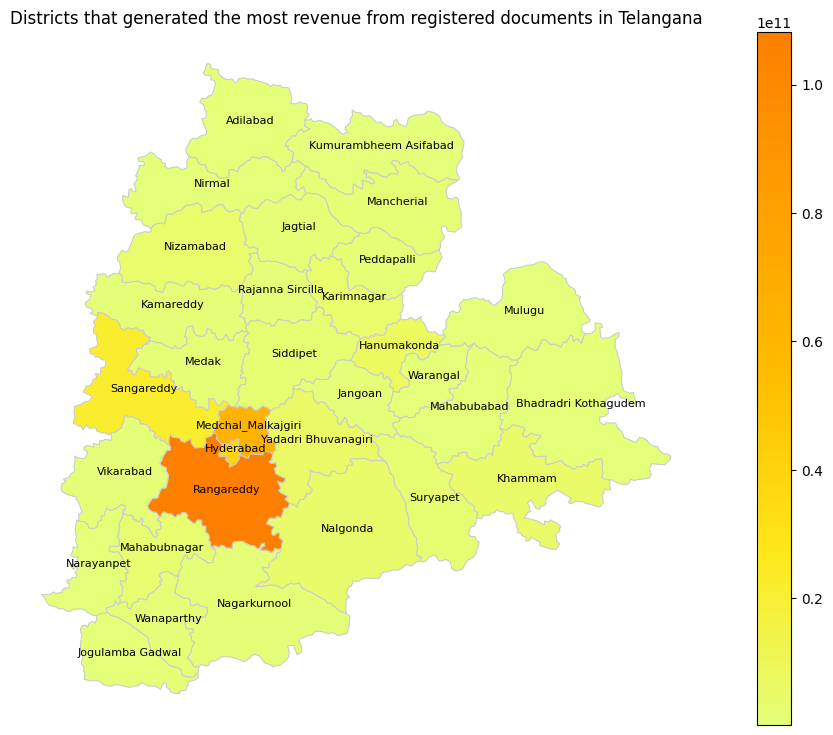

In [ ]:
gdf.rename(columns={'Dist_Name': 'district'}, inplace=True)
drs = dfs.groupby('district')['documents_registered_rev'].sum().reset_index()
drsm = gdf.merge(drs, on=['district'])

fig, ax = plt.subplots(1, 1, figsize=(14, 9))
drsm.plot(column='documents_registered_rev', cmap='Wistia', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
for idx, row in drsm.iterrows():
    ax.annotate(text=row['district'], xy=row['geometry'].centroid.coords[0],
                xytext=(3, 3), textcoords='offset points', fontsize=8, ha='center', va='center')

ax.set_title('Districts that generated the most revenue from registered documents in Telangana')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.axis('off')
plt.show()

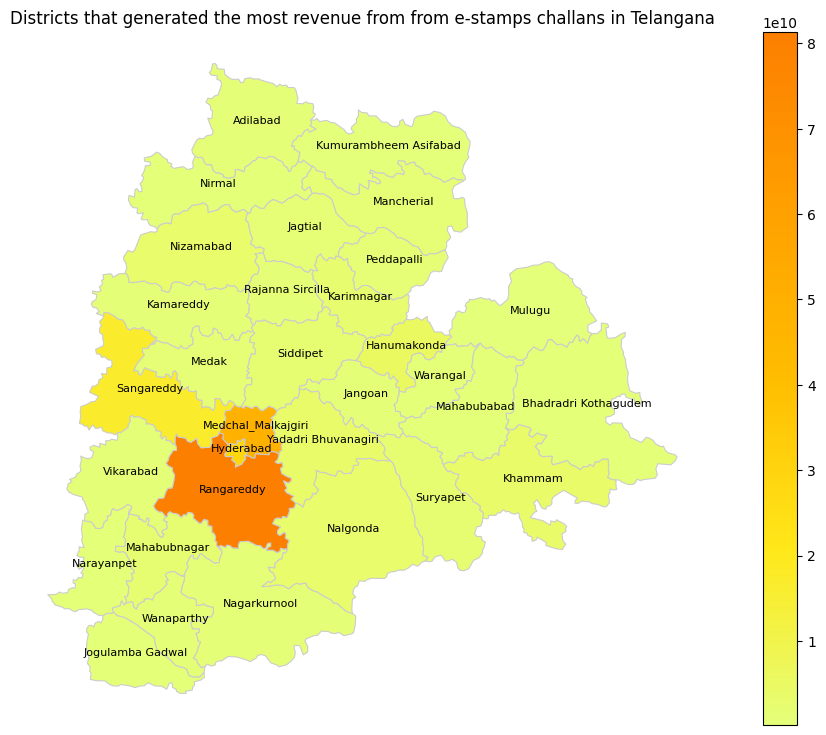

In [ ]:
ers = dfs.groupby('district')['estamps_challans_rev'].sum().reset_index()
ersm = gdf.merge(ers, on=['district'])

fig, ax = plt.subplots(1, 1, figsize=(14, 9))
ersm.plot(column='estamps_challans_rev', cmap='Wistia', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
for idx, row in ersm.iterrows():
    ax.annotate(text=row['district'], xy=row['geometry'].centroid.coords[0],
                xytext=(3, 3), textcoords='offset points', fontsize=8, ha='center', va='center')

ax.set_title('Districts that generated the most revenue from from e-stamps challans in Telangana')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.axis('off')
plt.show()

**District Performance**

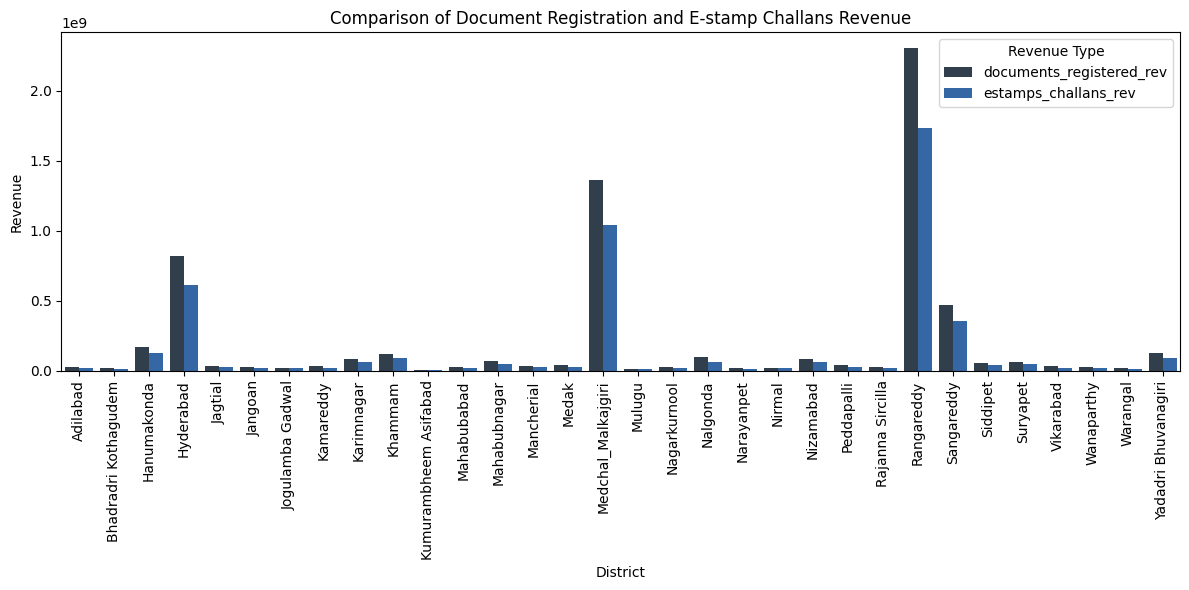

In [ ]:
melt_der =  pd.melt(dfs, id_vars=['dist_code', 'district'], value_vars=['documents_registered_rev', 'estamps_challans_rev'],
                    var_name='revenue_type', value_name='revenue')

colors = ["#2C3E50","#2165B6"]

plt.figure(figsize=(12, 6))
sns.barplot(data=melt_der, x='district', y='revenue', hue='revenue_type', ci=None,palette=colors)
plt.title('Comparison of Document Registration and E-stamp Challans Revenue')
plt.xlabel('District')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(title='Revenue Type')
plt.show()

*Inference : The revenue collected by the districts is unevenly distributed. A small number of districts, about 5-6, are collecting a disproportionately large share of the revenue. These districts are often more populous, have higher economic activity. The rest of the districts are collecting much less revenue*

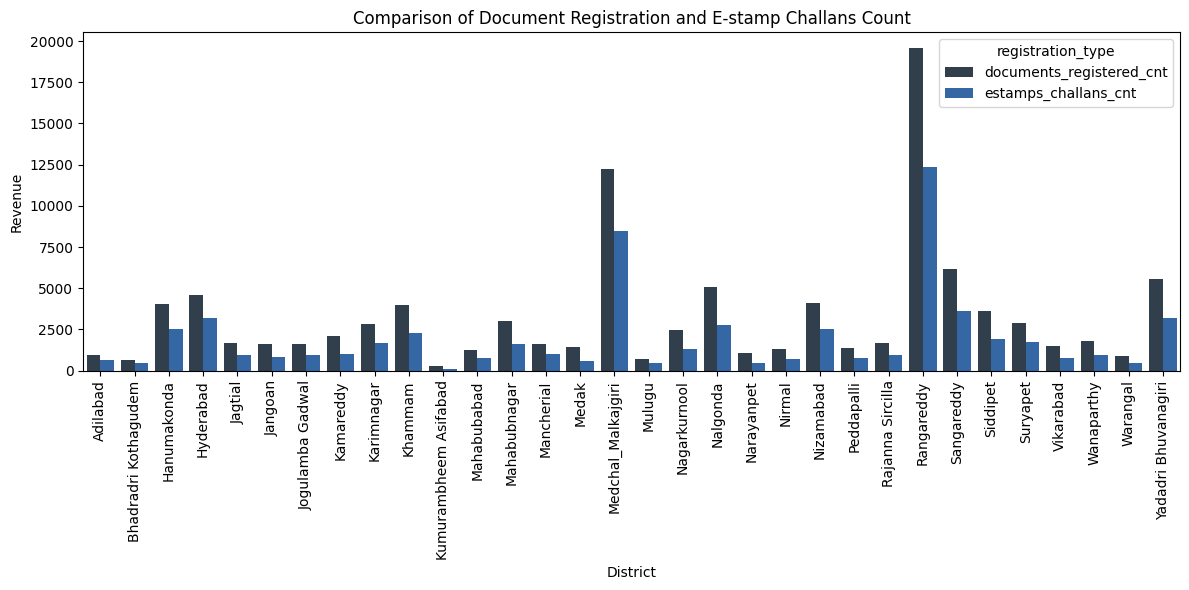

In [ ]:
melt_dec = dfs.melt(id_vars=['dist_code', 'district'],
                    value_vars=['documents_registered_cnt', 'estamps_challans_cnt'],
                    var_name='registration_type', value_name='count')

colors = ["#2C3E50","#2165B6"]

plt.figure(figsize=(12, 6))
sns.barplot(data=melt_dec, x='district', y='count', hue='registration_type', ci=None,palette=colors)
plt.title('Comparison of Document Registration and E-stamp Challans Count')
plt.xlabel('District')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.tight_layout()
# plt.legend(title='R')
plt.show()

*Inference : Excluding the 5-6 districts, the remaining districts are also major contributors. Their GDP scores are high, while the rest are lower.*

**Seasonal Patterns**

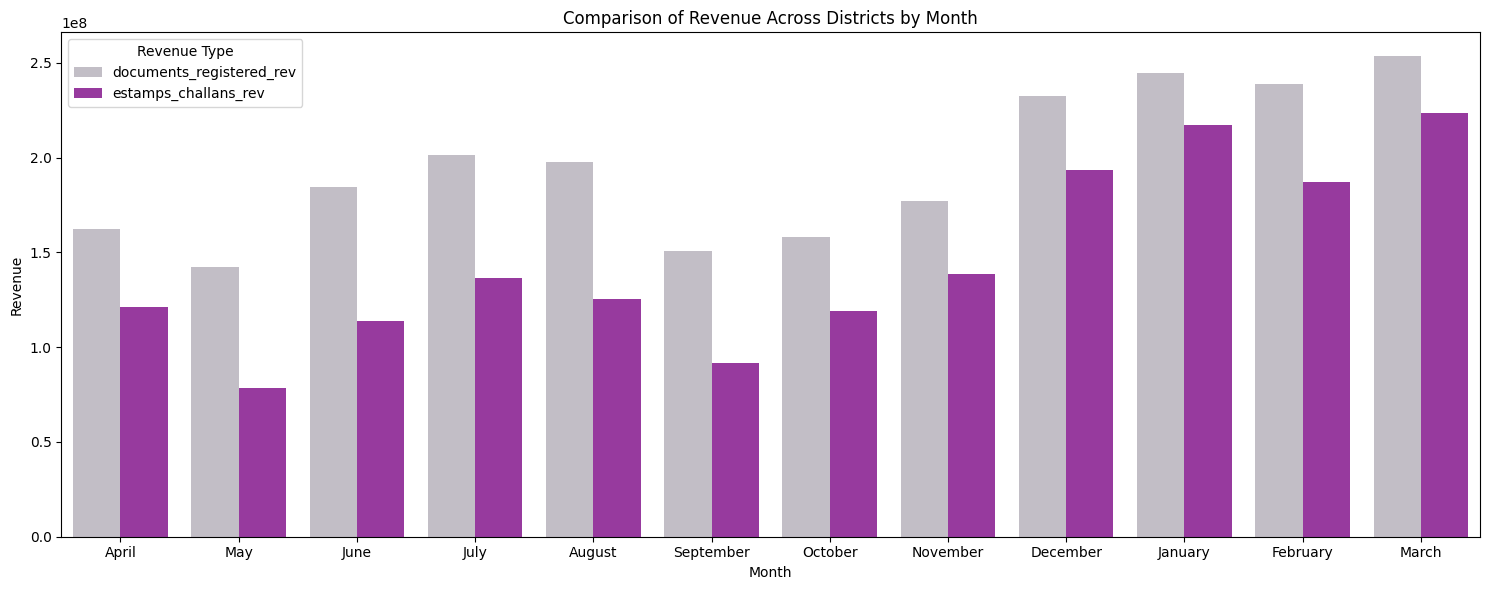

In [ ]:
melted_md = pd.melt(dfs, id_vars=['month', 'district'], value_vars=['documents_registered_rev', 'estamps_challans_rev'],
                    var_name='revenue_type', value_name='revenue')


colors = ["#C2BDC7","#A629AF"]
plt.figure(figsize=(15, 6))
sns.barplot(data=melted_md, x='month', y='revenue', hue='revenue_type',ci=None, palette=colors)
plt.title('Comparison of Revenue Across Districts by Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(title='Revenue Type')
plt.show()

*Inference : December, January, February and March are the months when people pay the most taxes while In September,very less number of people paying taxes*

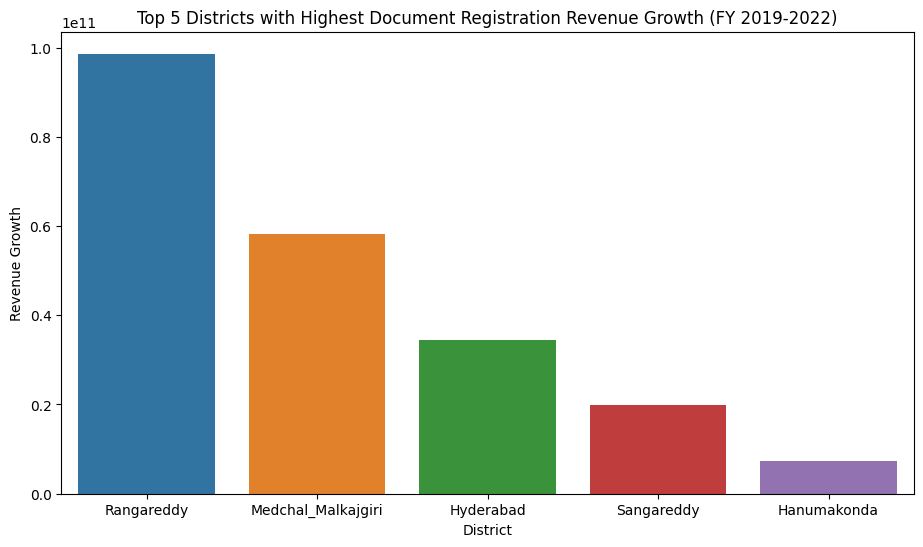

In [ ]:
fy = dfs[(dfs['date'] >= '2019-01-01') & (dfs['date'] <= '2022-12-31')]
dd =  fy.groupby('district').sum().sort_values(ascending=False, by='documents_registered_rev').reset_index()
plt.figure(figsize=(11, 6))
sns.barplot(data=dd[0:5], x='district', y='documents_registered_rev')
plt.title('Top 5 Districts with Highest Document Registration Revenue Growth (FY 2019-2022)')
plt.xlabel('District')
plt.ylabel('Revenue Growth')
# plt.gca().set_yticklabels(['{:.1f} Cr'.format(x) for x in plt.gca().get_yticks()])
plt.show()

*Inference : Rangareddy district has the largest document registration revenue,  generating more money than any other districts.*

**How does the revenue generated from document registration compare to the revenue generated from e-stamp challans across districts ?**

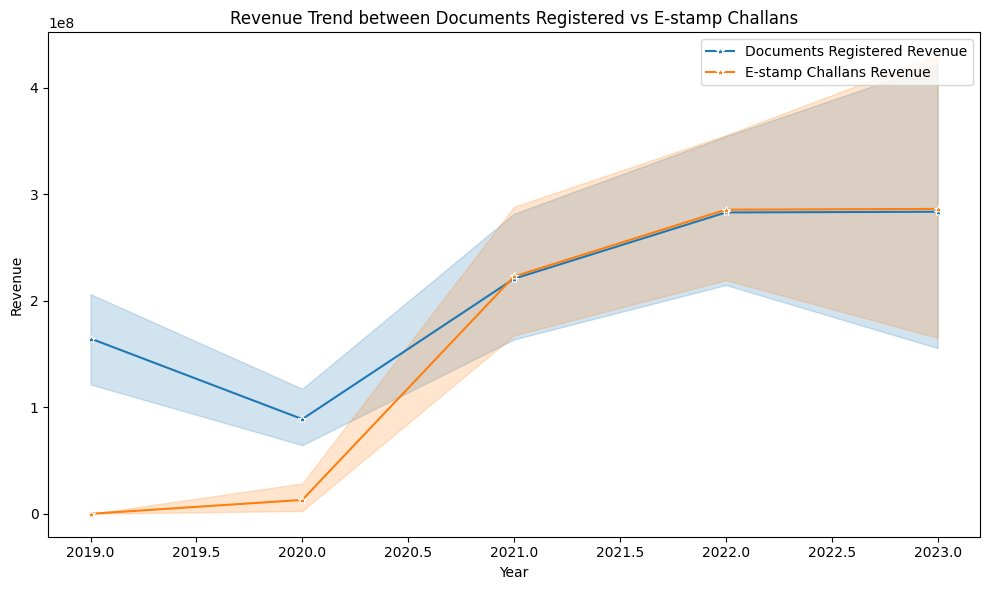

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=dfs, x='year', y='documents_registered_rev', label='Documents Registered Revenue',marker='*')
sns.lineplot(data=dfs, x='year', y='estamps_challans_rev', label='E-stamp Challans Revenue',marker='*')
plt.title('Revenue Trend between Documents Registered vs E-stamp Challans')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.legend()
plt.tight_layout()
plt.show()

*Inference : The trend shows that E-stamp challan was not popular initially, but its usage is increasing every year.*

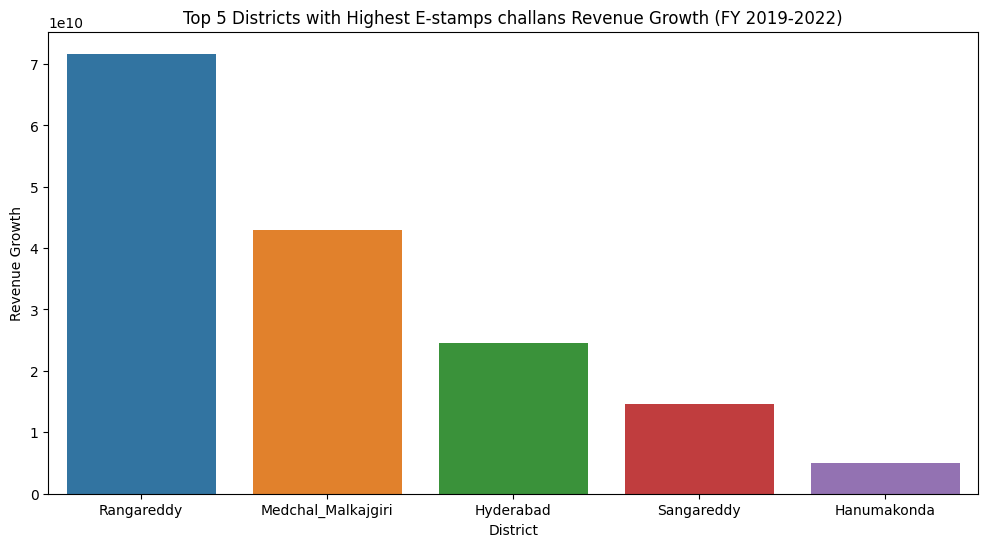

In [ ]:
ec = fy.groupby('district').sum().sort_values(ascending=False, by='estamps_challans_rev').reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=ec[0:5], x='district', y='estamps_challans_rev')
plt.title('Top 5 Districts with Highest E-stamps challans Revenue Growth (FY 2019-2022)')
plt.xlabel('District')
plt.ylabel('Revenue Growth')
# plt.gca().set_yticklabels(['{:.1f} Cr'.format(x) for x in plt.gca().get_yticks()])
plt.show()

*Inference : Rangareddy is the district with the highest document registration revenue in the Telangana state, with a revenue that exceeds that of any other districts.*

In [ ]:
dr = dfs.groupby('district').sum().sort_values(ascending=False, by='documents_registered_rev').reset_index()
min_value = 227462583
max_value = 108198682900

range_size = (max_value - min_value) / 3
ranges = [min_value, min_value + range_size, min_value + 2 * range_size, max_value]
labels = ['Low', 'Medium', 'High']

dr['revenue_segment'] = pd.cut(dr['documents_registered_rev'], bins=ranges, labels=labels, right=False)

In [ ]:
colors = ["#A821B6", "#5721B6", "#2123B6"]

fig = px.funnel(dr, x='documents_registered_cnt', y='district', color='revenue_segment', color_discrete_sequence=colors)
fig.update_layout(
    title="Districts into 3 Segments Based on Their Stamp Registration Revenue Generation",
    xaxis_title="Documents Count",
    yaxis_title="District",
    xaxis=dict(tickangle=-45),
    legend_title="Revenue Segment"
)

fig.show()

#### **Insights**
* Rangareddy district consistently tops the charts in revenue collection among all districts we can consider it's the highest revenue-generating district because of its strong GDP and high per capita income there is number of factors, including its strategic location, its diverse economy, and its skilled workforce The district is located in the suburbs of Hyderabad, making it a major transportation and logistics hub.However, Ranga Reddy district's GDP is unmatched by any other district.

* Rangareddy, Medchal Malkajgiri, Hyderabad, Sangareddy, Hanumakonda these 5 districts consistently rank at the top in revenue collection. Kumarambbheem Asifabad district generates the least amount of tax revenue among all districts.

* The state with the highest document registration revenue also has the highest E-stamp challan revenue. The relationship between document registration revenue and E-stamp challan revenue is direct.

* March is the end of the financial year, so businesses and individuals have to pay taxes on their income for the previous year.As a result, the government collects more taxes in March than in other months.

* The trend shows that eStamp was not popular initially, but its usage is increasing every year. possibly due to the convenience of filling out the form online. eSTAMPS was launched by the Registration and Stamps Department, Telangana on 11th April, 2016. In the early years, e-stamp challan was not widely used  but its usage has been increasing steadily every year. This may be due to a number of factors, including the increasing availability of internet access, the growing popularity of online transactions, and the convenience of filling out the form online.It is more efficient. People can receive their e-stamp challan immediately after submitting the form, which can save them time and hassle.

# **Transportation**

In [ ]:
## Merging the two DataFrames based on the 'dist_code' column
dft = pd.merge(dim_districts, fact_transport, on=['dist_code'])

In [ ]:
dft['date'] = pd.to_datetime(dft['month'])
dft['year'] = dft['date'].dt.year
dft = dft.drop(columns=['month'])
dft['month'] = dft['date'].dt.month
dft['month'] = dft['date'].dt.strftime('%B')
dft['month_year'] = dft['date'].dt.strftime('%Y-%m')

In [ ]:
display(dft.sample(5))
print("SIZE ",dft.shape)

dist_code            district  fuel_type_petrol  fuel_type_diesel  \
591       14_1        Mahabubnagar              3802               618   
1325      14_4          Wanaparthy               836               196   
322       14_2    Jogulamba Gadwal              1140               162   
687       17_1               Medak              1716               377   
739       15_2  Medchal_Malkajgiri             23989              2296   

      fuel_type_electric  fuel_type_others  vehicleClass_MotorCycle  \
591                    6                 4                     3570   
1325                   7                 6                      763   
322                    8                 0                     1064   
687                    2                 0                     1617   
739                   83                88                    19304   

      vehicleClass_MotorCar  vehicleClass_AutoRickshaw  \
591                     294                         38   
1325                     89                         23   
322                     102                          6   
687                     113                         16   
739                    5823                          0   

      vehicleClass_Agriculture  vehicleClass_others  seatCapacity_1_to_3  \
591                        202                  326                 4084   
1325                        79                   91                  926   
322                         64                   74                 1198   
687                        114                  235                 1960   
739                         63                 1266                20518   

      seatCapacity_4_to_6  seatCapacity_above_6  Brand_new_vehicles  \
591                   306                    40                4265   
1325                  108                    11                1005   
322                    98                    14                1262   
687                   119                    16                2029   
739                  5384                   552               24345   

      Pre-owned_vehicles  category_Non-Transport  category_Transport  \
591                  165                    4098                 332   
1325                  40                     932                 113   
322                   48                    1232                  78   
687                   66                    1874                 221   
739                 2111                   25270                1186   

           date  year      month month_year  
591  2020-07-01  2020       July    2020-07  
1325 2021-09-01  2021  September    2021-09  
322  2022-02-01  2022   February    2022-02  
687  2020-07-01  2020       July    2020-07  
739  2020-11-01  2020   November    2020-11

SIZE  (1440, 22)


In [ ]:
dft.rename(columns={"fuel_type_petrol": "Petrol", "fuel_type_diesel": "Diesel", "fuel_type_electric": "Electric", "fuel_type_others": "Others"}, inplace=True)

**Fuel Type Usage**

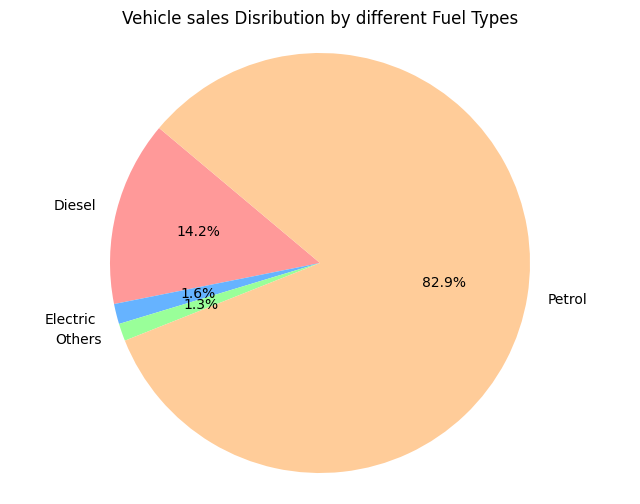

In [ ]:
fuel =  pd.melt(dft , id_vars=['district'], value_vars=['Petrol', 'Diesel','Electric', 'Others'],
                    var_name='fuel_type', value_name='total')
fuel_type_count =  fuel.groupby('fuel_type')['total'].sum().to_frame().reset_index()
plt.figure(figsize=(8, 6))
plt.pie(fuel_type_count['total'], labels=fuel_type_count['fuel_type'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.axis('equal')
plt.title("Vehicle sales Disribution by different Fuel Types")
plt.show()

*Inference : Petrol is the fuel that has the highest consumption rate*

**Regional Preferences**

In [ ]:
fuel_type_val = fuel.groupby(['district','fuel_type']).sum().sort_values(ascending=False, by='total').reset_index()
p = fuel_type_val[fuel_type_val['fuel_type'] == 'Petrol']
d = fuel_type_val[fuel_type_val['fuel_type'] == 'Diesel']
e = fuel_type_val[fuel_type_val['fuel_type'] == 'Electric']
o = fuel_type_val[fuel_type_val['fuel_type'] == 'Others']

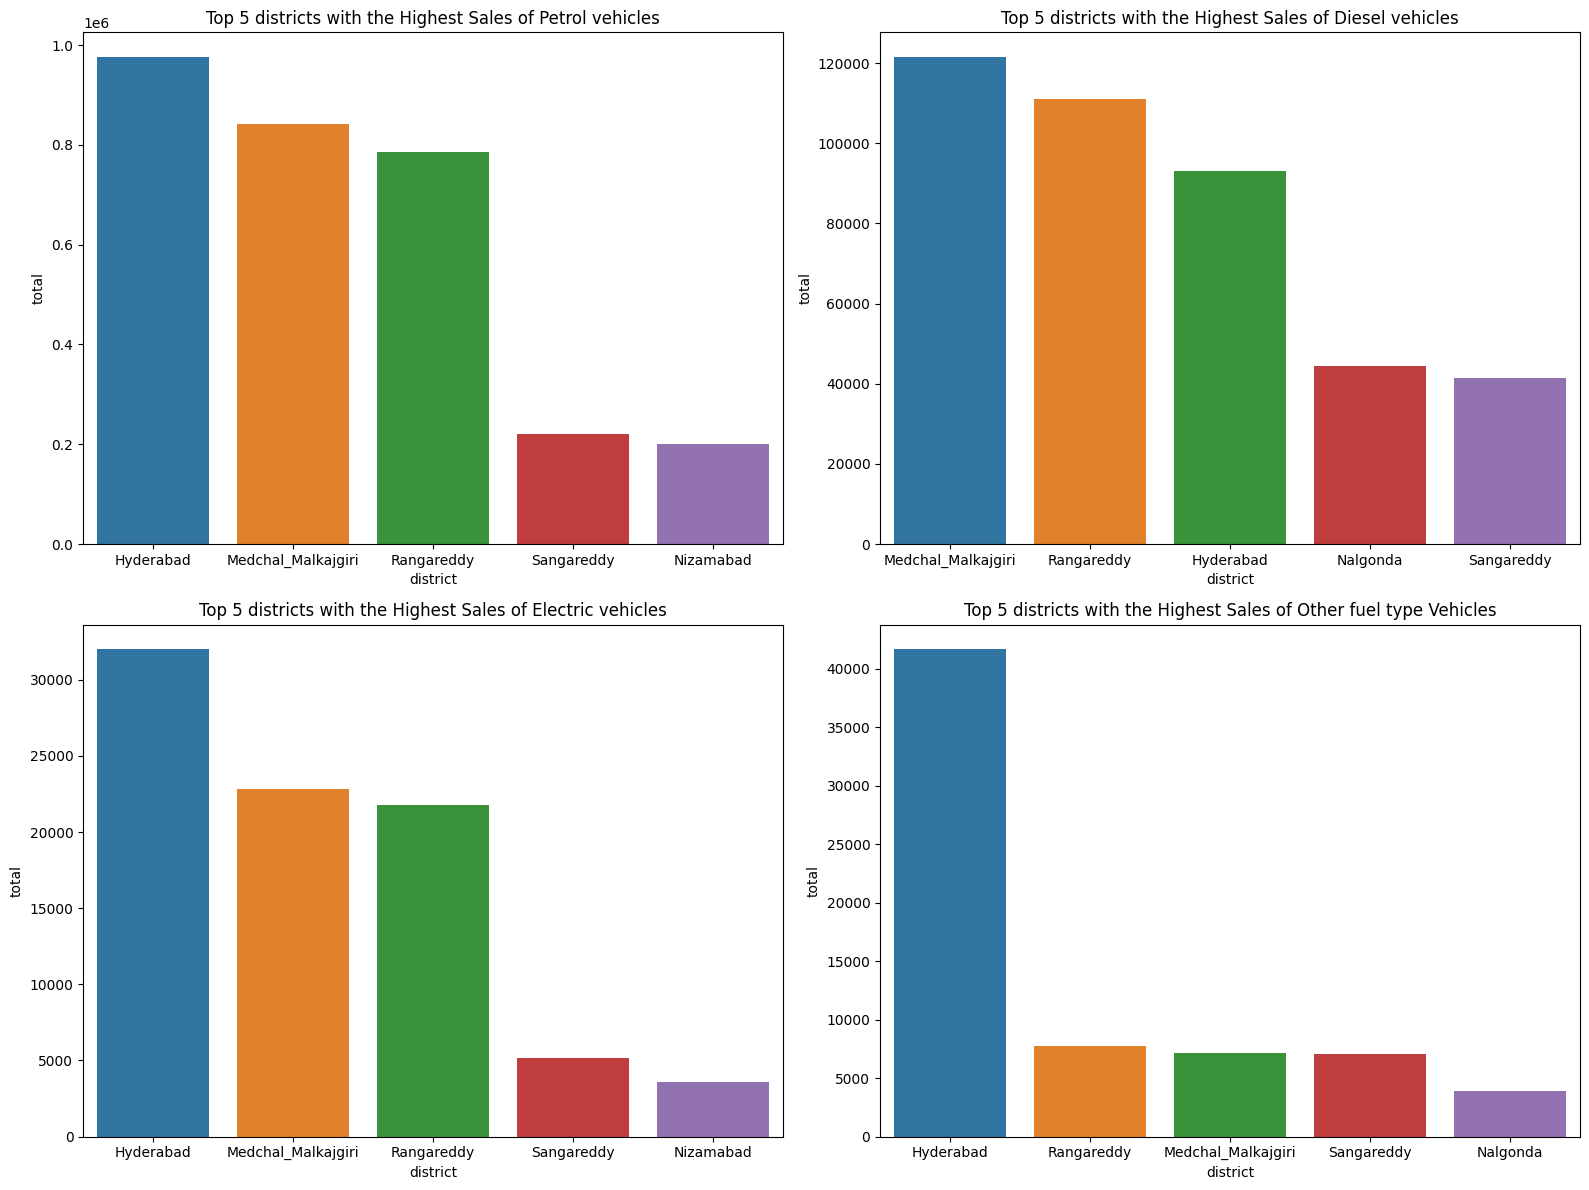

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.barplot(data=p[0:5], x='district', y='total', ax=axes[0, 0])
axes[0, 0].set_title('Top 5 districts with the Highest Sales of Petrol vehicles')

sns.barplot(data=d[0:5], x='district', y='total', ax=axes[0, 1])
axes[0, 1].set_title('Top 5 districts with the Highest Sales of Diesel vehicles')

sns.barplot(data=e[0:5], x='district', y='total', ax=axes[1, 0])
axes[1, 0].set_title('Top 5 districts with the Highest Sales of Electric vehicles')

sns.barplot(data=o[0:5], x='district', y='total', ax=axes[1, 1])
axes[1, 1].set_title('Top 5 districts with the Highest Sales of Other fuel type Vehicles')

plt.tight_layout()
plt.show()

*Inference :*
* *Hyderabad, Medchal Malkajgiri, Rangareddy, Sangareddy and Nizambad Petrol vehicles are the most popular type of vehicle in these districts. while Hyderabad with the highest sales of petrol vehicles in Telangana. Hyderabad has the highest number of petrol vehicle*

* *The top 5 districts in Telangana with the highest sales of diesel vehicles are Medchal Malkajgiri, Rangareddy, Hyderabad, Nalgonda, and Sangareddy.These are the districts in Telangana where the most diesel vehicles are sold. Medchal Malkajgiri district has the highest number of diesel vehicle registrations in Telangana, with over 120,000 vehicles sold.*

* *Hyderabad, Medchal Malkajgiri, Rangareddy, Sangareddy, Nizambad These five districts account for over 80% of the electric vehicle registrations in Telangana. The demand for electric vehicles is highest in Hyderabad, due to its large population and congested traffic*

* *Other fuel types, such as CNG and biofuels, are the most popular in the top 5 districts of Telangana are Hyderabad, Rangareddy, Medchal Malkajgiri, Sangareddy, and Nalgonda. Hyderabad has the highest number of vehicle registrations for other fuel types, with over 41,680 vehicles sold.*

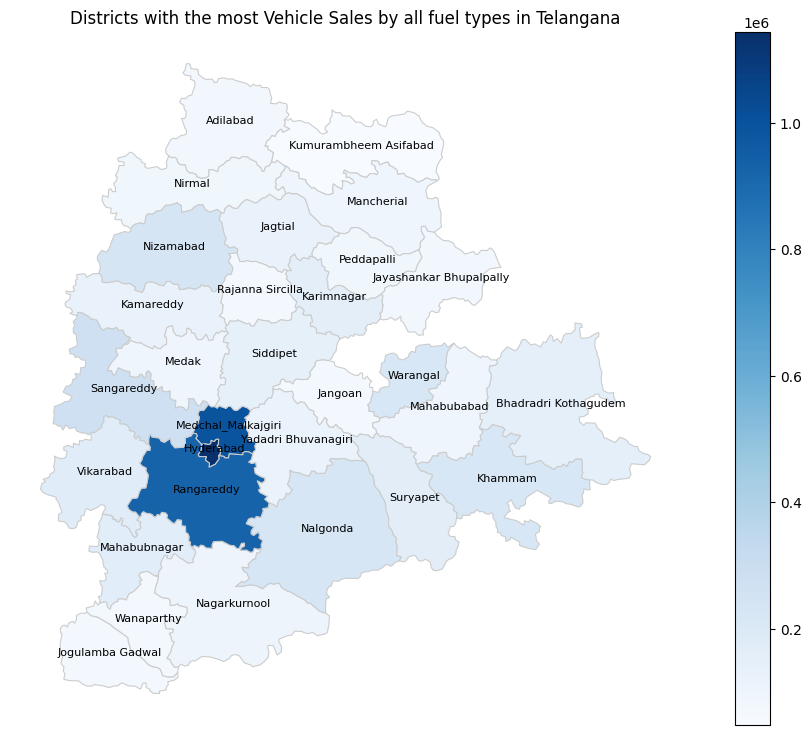

In [ ]:
veh = fuel.groupby(['district']).sum().sort_values(ascending=False, by='total').reset_index()

veh_g =  gdf.merge(veh, on=['district'])

fig, ax = plt.subplots(1, 1, figsize=(14, 9))
veh_g.plot(column='total', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
for idx, row in veh_g.iterrows():
    ax.annotate(text=row['district'], xy=row['geometry'].centroid.coords[0],
                xytext=(3, 3), textcoords='offset points', fontsize=8, ha='center', va='center')

ax.set_title('Districts with the most Vehicle Sales by all fuel types in Telangana')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.axis('off')
plt.show()

**Dominant Fuel Type**

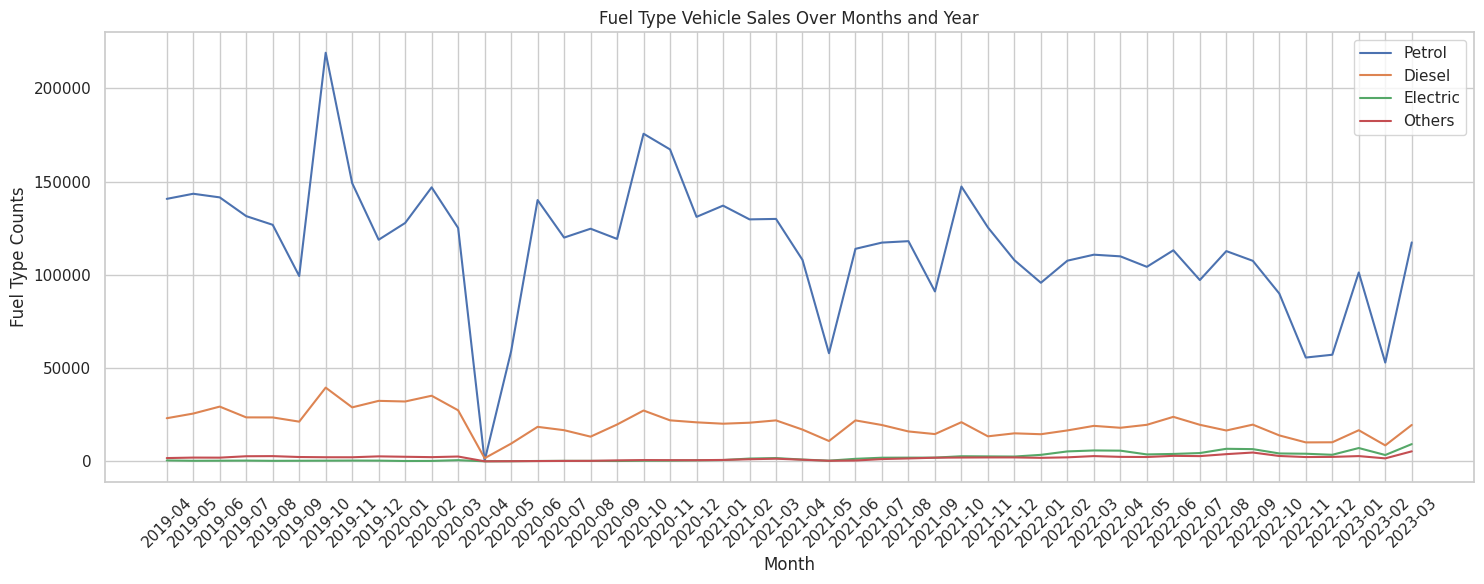

In [ ]:
yft = dft.groupby(['month_year'])['Petrol', 'Diesel','Electric', 'Others'].sum().reset_index()
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.lineplot(data=yft, x='month_year', y='Petrol', label='Petrol')
sns.lineplot(data=yft, x='month_year', y='Diesel', label='Diesel')
sns.lineplot(data=yft, x='month_year', y='Electric', label='Electric')
sns.lineplot(data=yft, x='month_year', y='Others', label='Others')
plt.xlabel('Month')
plt.ylabel('Fuel Type Counts')
plt.title('Fuel Type Vehicle Sales Over Months and Year')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Inference: The popularity of petrol vehicles is plateauing, The plot suggests that the sales of petrol vehicles are slowing down in the latter half of 2022, but not significantly. The graph shows that the trend for all fuel types suddenly declined when the lockdown started due to COVID-19*

In [ ]:
mft = pd.melt(dft , id_vars=['district','month_year'], value_vars=['Petrol', 'Diesel','Electric', 'Others'],
                    var_name='fuel_type', value_name='total')

mdft = mft.groupby(['district','month_year'])['total'].sum().reset_index()

fig = px.line(mdft, x="month_year", y="total", color='district')
fig.update_layout(title='Distribution of Vehicle sales by fuel types across Districts')
fig.show()

*Inference : The graph provides clear evidence that the consumption of fuels dropped significantly during the COVID-19 pandemic in First wave of March 2020. The usage of fuels decreased during the second wave of the COVID-19 pandemic, but not as much as it did during the first wave. The trend of fuel usage is increasing in all districts in October, which may be due to Diwali.The use of fuels is not widespread in rural areas. Possibly due to fuels are not a major part of the transportation landscape in rural areas.*

**Vehicle Class Distribution**

In [ ]:
veht = pd.melt(dft , id_vars=['district'], value_vars=['vehicleClass_MotorCycle','vehicleClass_MotorCar','vehicleClass_AutoRickshaw','vehicleClass_Agriculture','vehicleClass_others'],
                    var_name='vehicle_type', value_name='total')

veht['vehicle_type'] = veht['vehicle_type'].replace('vehicleClass_MotorCycle', 'MotorCycle')
veht['vehicle_type'] = veht['vehicle_type'].replace('vehicleClass_MotorCar', 'MotorCar')
veht['vehicle_type'] = veht['vehicle_type'].replace('vehicleClass_AutoRickshaw', 'AutoRickshaw')
veht['vehicle_type'] = veht['vehicle_type'].replace('vehicleClass_Agriculture', 'Agriculture')
veht['vehicle_type'] = veht['vehicle_type'].replace('vehicleClass_others', 'Others')

In [ ]:
veht_val = veht.groupby(['district','vehicle_type']).sum().sort_values(ascending=False, by='total').reset_index()
m = veht_val[veht_val['vehicle_type'] == 'MotorCycle']
c = veht_val[veht_val['vehicle_type'] == 'MotorCar']
a = veht_val[veht_val['vehicle_type'] == 'AutoRickshaw']
ag = veht_val[veht_val['vehicle_type'] == 'Agriculture']
o = veht_val[veht_val['vehicle_type'] == 'Others']

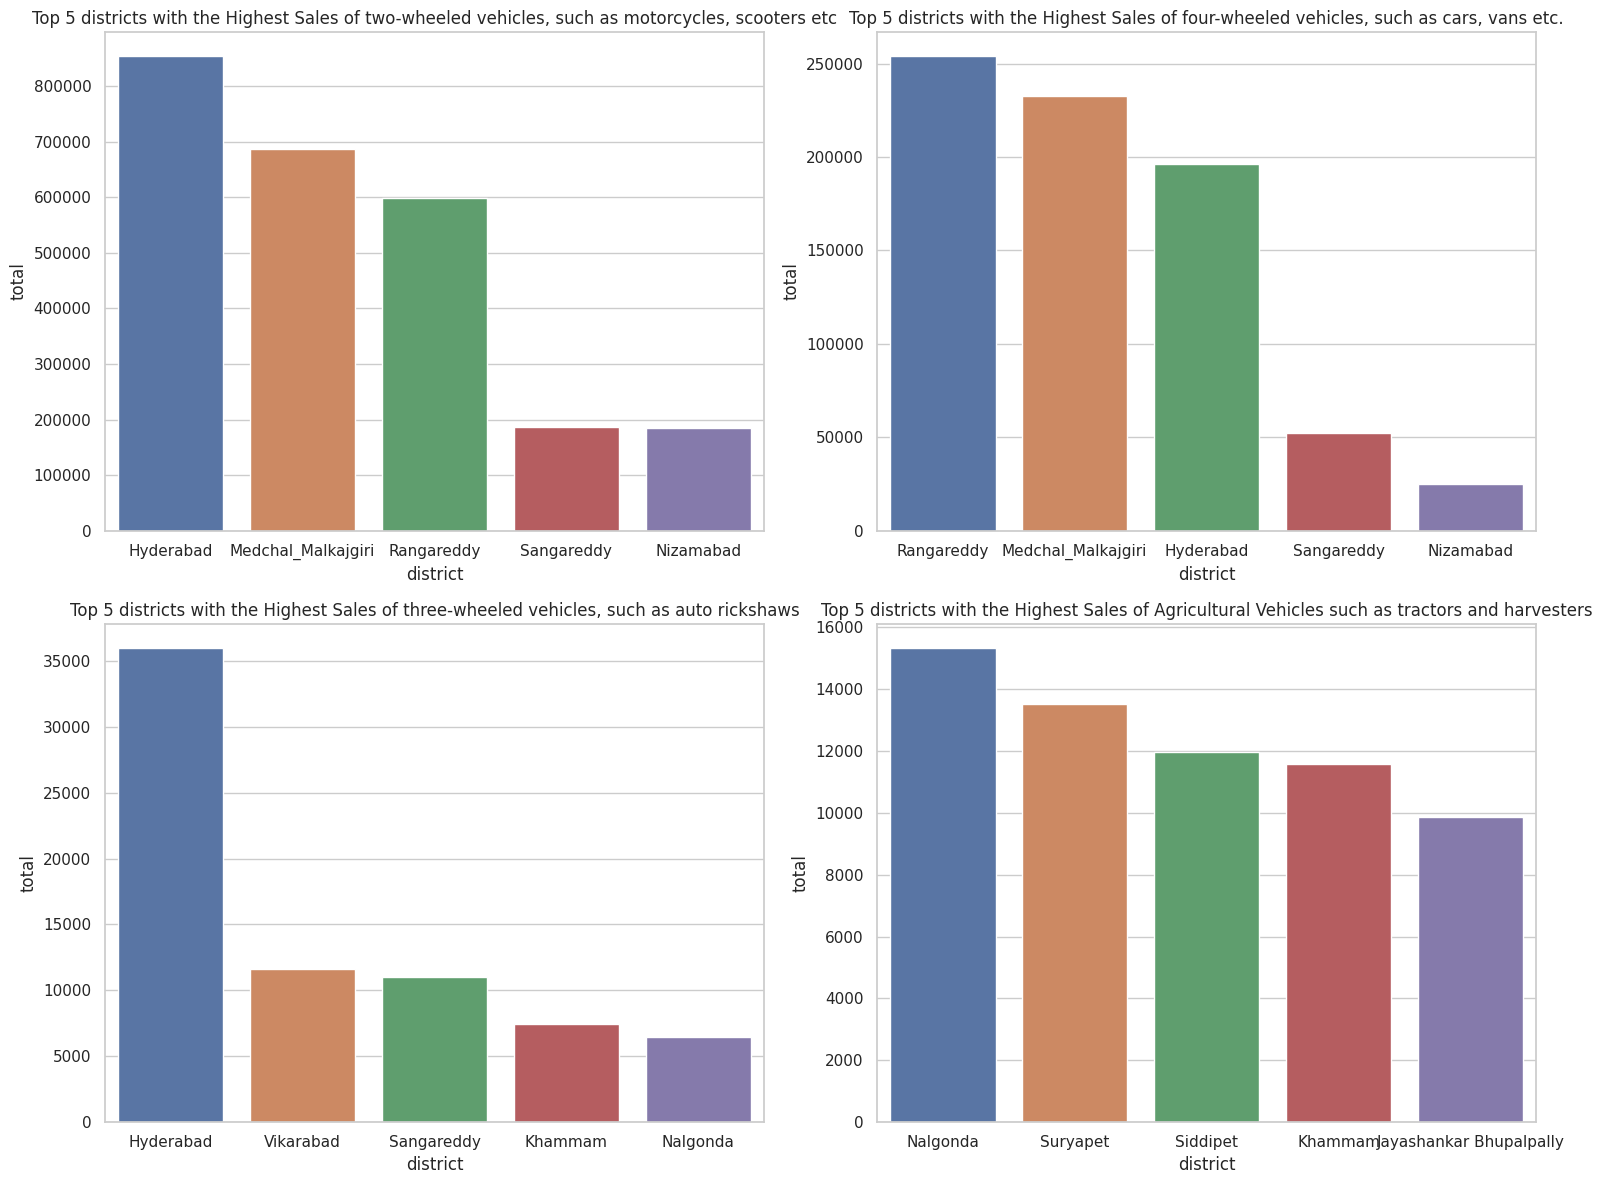

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.barplot(data=m[0:5], x='district', y='total', ax=axes[0, 0])
axes[0, 0].set_title('Top 5 districts with the Highest Sales of two-wheeled vehicles, such as motorcycles, scooters etc')

sns.barplot(data=c[0:5], x='district', y='total', ax=axes[0, 1])
axes[0, 1].set_title('Top 5 districts with the Highest Sales of four-wheeled vehicles, such as cars, vans etc.')

sns.barplot(data=a[0:5], x='district', y='total', ax=axes[1, 0])
axes[1, 0].set_title('Top 5 districts with the Highest Sales of three-wheeled vehicles, such as auto rickshaws')

sns.barplot(data=ag[0:5], x='district', y='total', ax=axes[1, 1])
axes[1, 1].set_title('Top 5 districts with the Highest Sales of Agricultural Vehicles such as tractors and harvesters')

plt.tight_layout()
plt.show()

*Inference :*
* *Two-wheelers and four-wheelers are becoming more popular in Hyderabad, Medchal Malkajgiri, Rangareddy, Sangareddy districts.*

* *The availability of good infrastructure in Hyderabad is making Sangareddy,Medchal Malkajgiri,Rangareddy district a more attractive place to live, which is driving up the demand for two-wheelers and four-wheelers.*

* *The demand for rickshaws is also high in Hyderabad, as they are a popular mode of transportation for short distances. Some of the districts in the top 5 in 3-Wheeler sales have a higher rural population than urban population. The high demand for three-wheelers in these districts is due to the fact that people in these areas travel more often using rickshaws.*

* *Nalgonda, Suryapet, Siddipet, Khammam, Jayashankar Bhupalpally some of these districts are known for its agricultural production. The demand for tractors and harvesters is high in these districts, due to the region's agricultural importance.The agricultural sector is driving economic growth in these districts, and tractors and harvesters are playing a key role in this growth.*



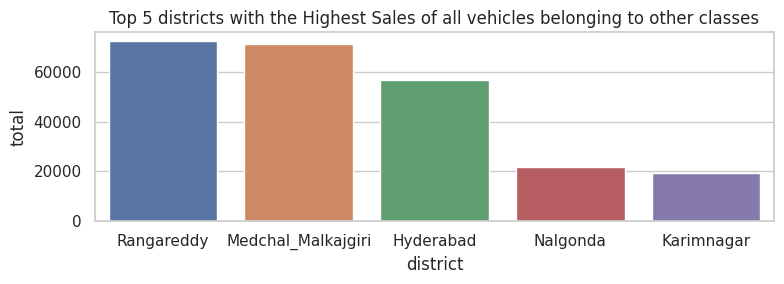

In [ ]:
plt.figure(figsize=(8,3))
sns.barplot(data=o[0:5], x='district', y='total')
plt.title('Top 5 districts with the Highest Sales of all vehicles belonging to other classes')
plt.tight_layout()
plt.show()

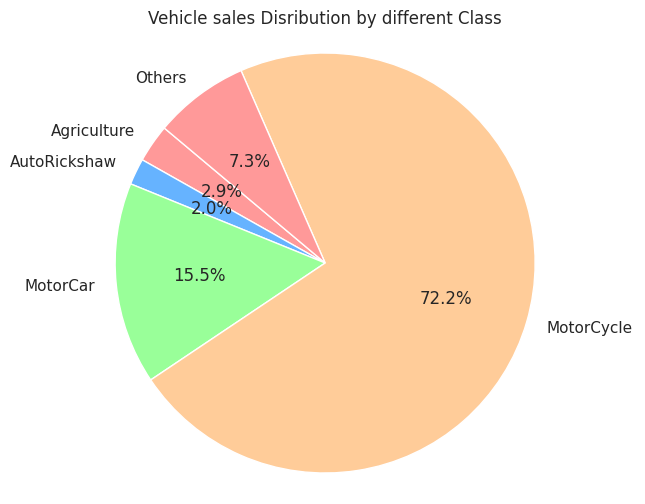

In [ ]:
veht_total = veht.groupby('vehicle_type')['total'].sum().to_frame().reset_index()
plt.figure(figsize=(8, 6))
plt.pie(veht_total['total'], labels=veht_total['vehicle_type'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.axis('equal')
plt.title("Vehicle sales Disribution by different Class")
plt.show()

*Inference : Motorcycles are the most popular type of vehicle in Telangana, with sales far exceeding those of other vehicles. due to the state's large population and its relatively affordable cost of living.*

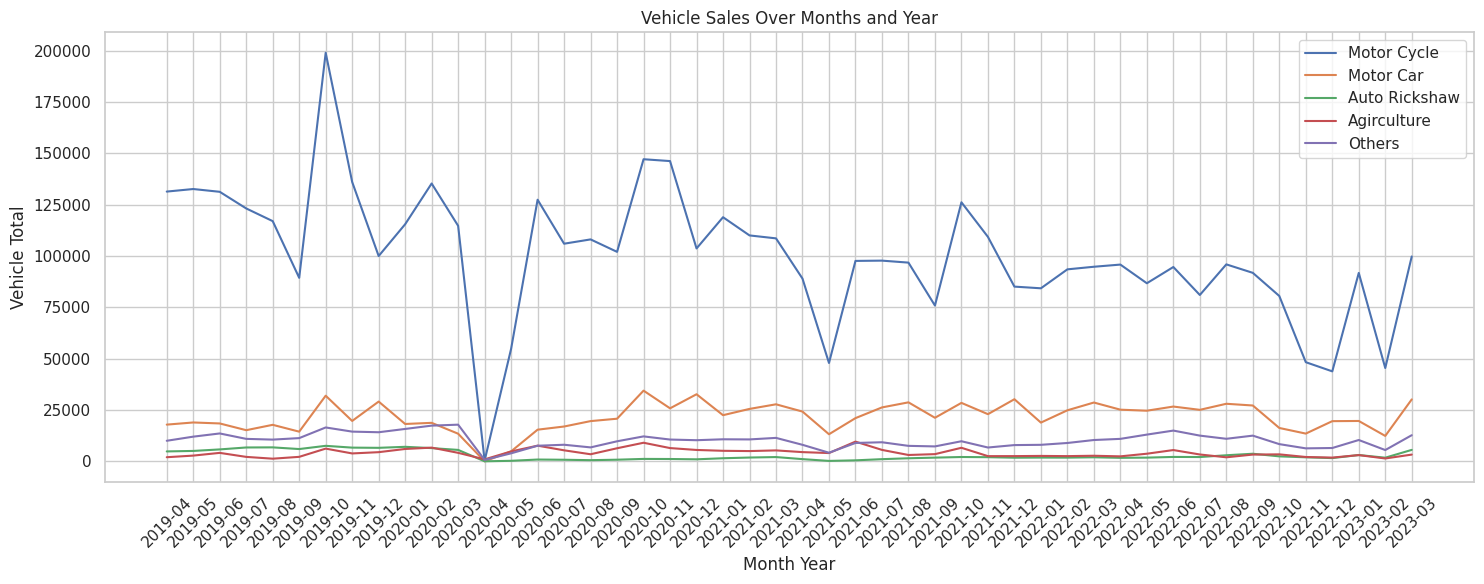

In [ ]:
vft = dft.groupby(['month_year'])['vehicleClass_MotorCycle', 'vehicleClass_MotorCar','vehicleClass_AutoRickshaw', 'vehicleClass_Agriculture','vehicleClass_others'].sum().reset_index()
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))
sns.lineplot(data=vft, x='month_year', y='vehicleClass_MotorCycle', label='Motor Cycle')
sns.lineplot(data=vft, x='month_year', y='vehicleClass_MotorCar', label='Motor Car')
sns.lineplot(data=vft, x='month_year', y='vehicleClass_AutoRickshaw', label='Auto Rickshaw')
sns.lineplot(data=vft, x='month_year', y='vehicleClass_Agriculture', label='Agirculture')
sns.lineplot(data=vft, x='month_year', y='vehicleClass_others', label='Others')
plt.xlabel('Month Year')
plt.ylabel('Vehicle Total')
plt.title('Vehicle Sales Over Months and Year')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*Inference :  The sales of vehicles were affected by both waves of the COVID-19 pandemic, but the first wave had a more significant impact. In middle of September and November month graph lines are on an upward trajectory, as evidenced by the trend. the same trend can be seen in the middle of November and December. The rising sales could be attributed to the festive season, when people in India typically buy new items during these festivals in Diwali or Dussehra.*

In [ ]:
fig = px.bar(veht_val, x="district", y="total", color="vehicle_type",
             title="Sales of Vehicle Type Distribution by District",
             labels={"total": "Total Sales", "district": "District", "vehicle_type": "Vehicle Type"})

fig.show()

In [ ]:
exclude_districts = ['Hyderabad', 'Medchal_Malkajgiri','Rangareddy','Sangareddy']
veht_val_filtered = veht_val[~veht_val['district'].isin(exclude_districts)]

fig = px.bar(veht_val_filtered, x="district", y="total", color="vehicle_type",
             title="Sales of Vehicle Type Distribution by District Exculding Top Urban District",
             labels={"total": "Total Sales", "district": "District", "vehicle_type": "Vehicle Type"})
fig.show()

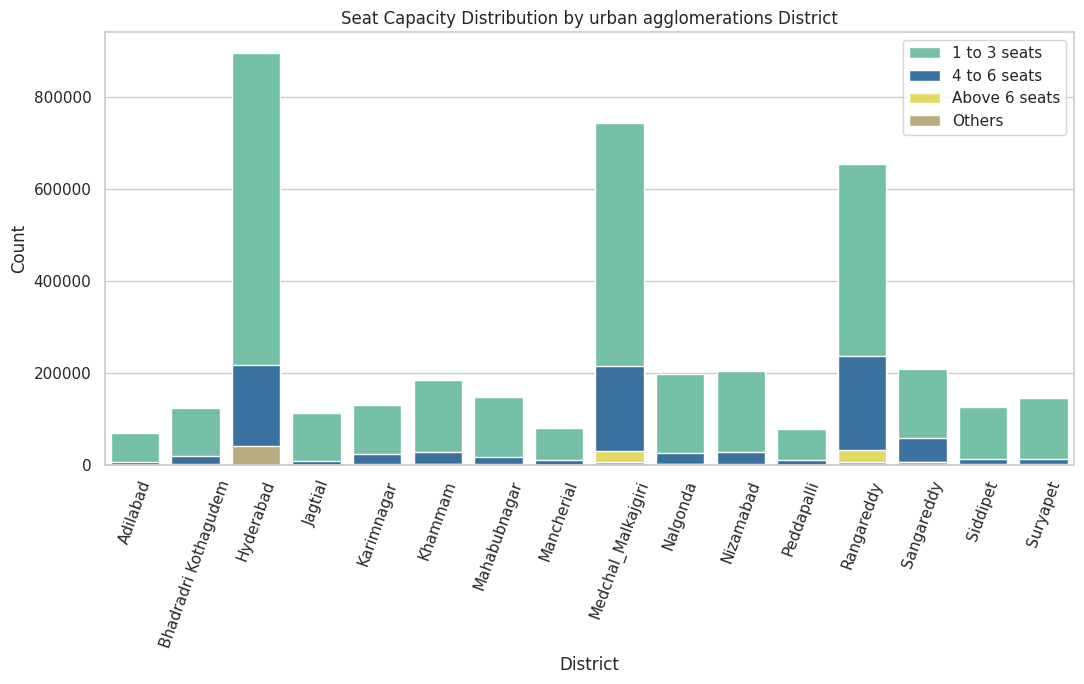

In [ ]:
seat = dft.groupby(['district'])['seatCapacity_1_to_3', 'seatCapacity_4_to_6','seatCapacity_above_6', 'Others'].sum().reset_index()

urban = [ 'Adilabad', 'Bhadradri Kothagudem', 'Hyderabad', 'Jagtial',
         'Karimnagar', 'Khammam', 'Mahabubnagar', 'Mancherial',
       'Medchal_Malkajgiri', 'Nalgonda',  'Nizamabad', 'Peddapalli', 'Rangareddy',
       'Sangareddy', 'Siddipet', 'Suryapet' ]

surban =  seat[seat['district'].isin(urban)]
srural = seat[~seat['district'].isin(urban)]

sns.set(style="whitegrid")
plt.figure(figsize=(11, 7))
ax = sns.barplot(x='district', y='seatCapacity_1_to_3', data=surban, color='#66cdaa', label='1 to 3 seats')
sns.barplot(x='district', y='seatCapacity_4_to_6', data=surban, color='#2973AF', label='4 to 6 seats', ax=ax)
sns.barplot(x='district', y='seatCapacity_above_6', data=surban, color='#faeb4e', label='Above 6 seats', ax=ax)
sns.barplot(x='district', y='Others', data=surban, color='#C3B076', label='Others', ax=ax)
plt.title("Seat Capacity Distribution by urban agglomerations District")
plt.xlabel("District")
plt.ylabel("Count")
plt.xticks(rotation=70)
plt.legend()
plt.tight_layout()
plt.show()

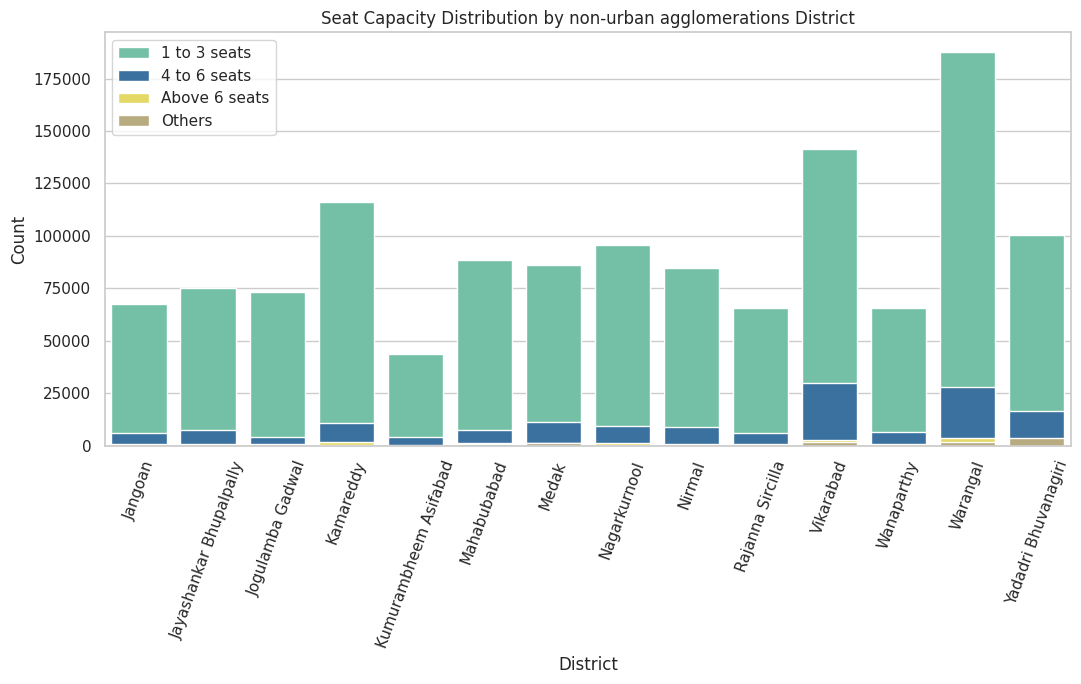

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(11, 7))
ax = sns.barplot(x='district', y='seatCapacity_1_to_3', data=srural, color='#66cdaa', label='1 to 3 seats')
sns.barplot(x='district', y='seatCapacity_4_to_6', data=srural, color='#2973AF', label='4 to 6 seats', ax=ax)
sns.barplot(x='district', y='seatCapacity_above_6', data=srural, color='#faeb4e', label='Above 6 seats', ax=ax)
sns.barplot(x='district', y='Others', data=srural, color='#C3B076', label='Others', ax=ax)
plt.title("Seat Capacity Distribution by non-urban agglomerations District")
plt.xlabel("District")
plt.ylabel("Count")
plt.xticks(rotation=70)
plt.legend()
plt.tight_layout()
plt.show()

*Inference : As we have already discussed, three-wheelers are a popular mode of transportation for commuting in both urban and rural areas. The popularity of three-wheelers and two-wheelers as a mode of transportation is likely to continue in the future, as they offer a sustainable and affordable solution to the transportation needs of people in both urban and rural areas.*

In [ ]:
bpv = dft.groupby(['district','month_year'])['Brand_new_vehicles','Pre-owned_vehicles'].sum().reset_index()

urban = [ 'Hyderabad', 'Medchal_Malkajgiri','Rangareddy','Sangareddy' ]

bpvurban =  bpv[bpv['district'].isin(urban)]
bpvrural = bpv[~bpv['district'].isin(urban)]

fig = px.scatter(bpvurban, x="month_year", y="Brand_new_vehicles", size="Brand_new_vehicles", color="district",
                 labels={"Brand_new_vehicles": "Brand New Vehicles"},
                 title="Bubble Chart of Brand New Vehicles by Month-Year Includes Top Urban Districts",
                 hover_name="district", hover_data=["Brand_new_vehicles"])
fig.show()

In [ ]:
fig = px.scatter(bpvurban, x="month_year", y="Pre-owned_vehicles", size="Pre-owned_vehicles", color="district",
                 labels={"Pre-owned_vehicles": "Pre-owned Vehicles"},
                 title="Bubble Chart of Pre-owned Vehicles by Month-Year Includes Top Urban Districts",
                 hover_name="district", hover_data=["Pre-owned_vehicles"])
fig.show()

In [ ]:
fig = px.scatter(bpvrural, x="month_year", y="Brand_new_vehicles", size="Brand_new_vehicles", color="district",
                 labels={"Brand_new_vehicles": "Brand New Vehicles"},
                 title="Bubble Chart of Brand New Vehicles by Month-Year Excludes Top Urban Districts",
                 hover_name="district", hover_data=["Brand_new_vehicles"])
fig.show()

In [ ]:
fig = px.scatter(bpvrural, x="month_year", y="Pre-owned_vehicles", size="Pre-owned_vehicles", color="district",
                 labels={"Pre-owned_vehicles": "Pre-owned Vehicles"},
                 title="Bubble Chart of Pre-owned Vehicles by Month-Year Excludes Top Urban Districts",
                 hover_name="district", hover_data=["Pre-owned_vehicles"])
fig.show()

In [ ]:
ct_melt =  dft.melt(id_vars=["district", "month_year"], value_vars=['category_Non-Transport','category_Transport'],
                    var_name="category_type", value_name="category_count")
urban = [ 'Hyderabad', 'Medchal_Malkajgiri','Rangareddy']

cturban =  ct_melt[ct_melt['district'].isin(urban)]
ctrural = ct_melt[~ct_melt['district'].isin(urban)]

fig = px.histogram(cturban, x="district", y="category_count",
             color='category_type', barmode='group', title="Bar Chart of Transport and Non-Transport Vehicles Includes Top Urban Districts",
             height=500)
fig.show()

In [ ]:
fig = px.histogram(ctrural, x="district", y="category_count",
             color='category_type', barmode='group',title="Bar Chart of Transport and Non-Transport Vehicles Excludes Top Urban Districts",
             height=500)
fig.show()

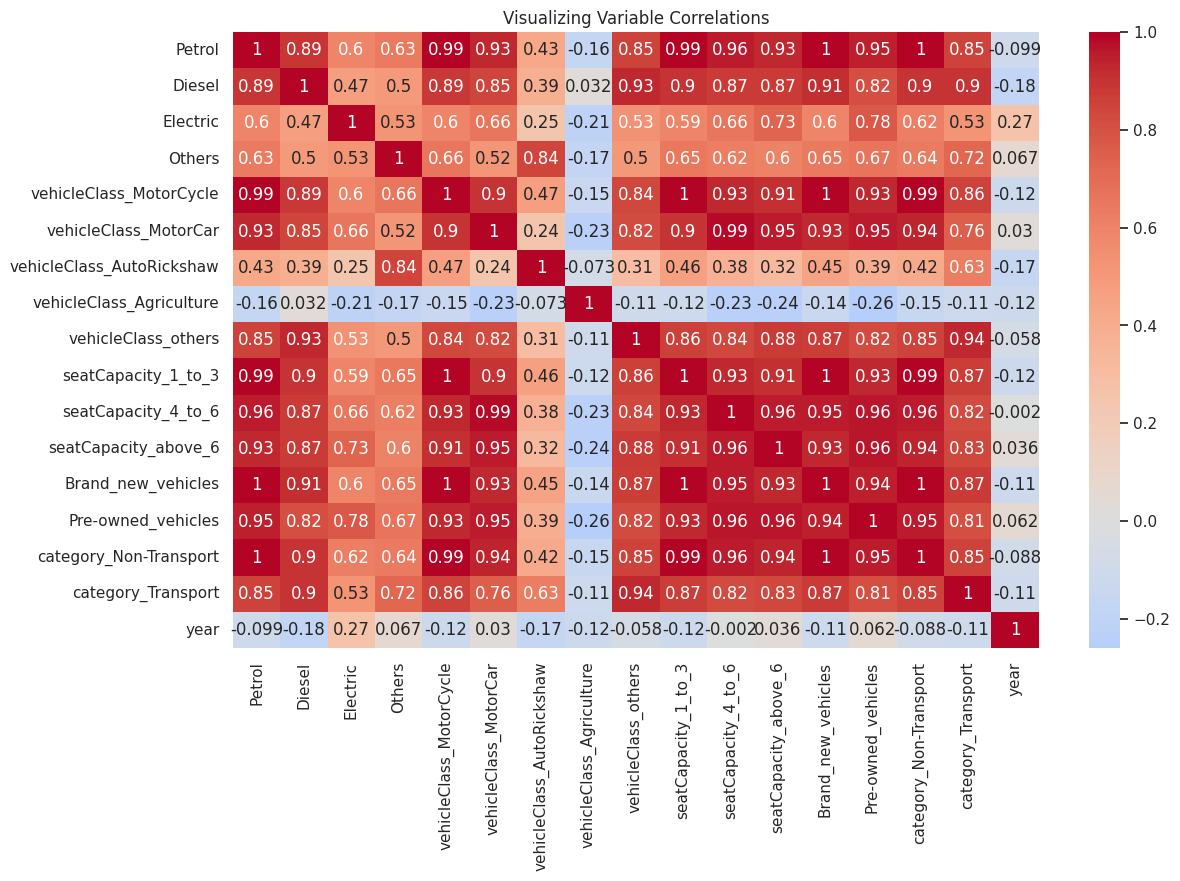

In [ ]:
plt.figure(figsize=(13, 8))
sns.heatmap(dft.corr() , annot=True, cmap="coolwarm", center=0)
plt.title("Visualizing Variable Correlations")
plt.show()

*Inference: Most of the variables are positively correlated*

#### **Insights**

* Petrol is the most commonly used fuel type in Telangana state.

* The districts of Hyderabad, Medchal Malkajgiri, Rangareddy, and Sangareddy are consistently top in Telangana.

* The districts of Hyderabad, Medchal Malkajgiri, Rangareddy, and Sangareddy are consistently top in Telangana because they are interconnected in many ways. They are all located in the central part of the state, and they are all well-connected by road, rail, and air. This makes it easy for people and goods to move between these districts, which in turn helps to boost the economy.

* These districts are all home to a number of major industries, including IT, manufacturing, and healthcare. This creates a lot of jobs and opportunities for people, which in turn leads to higher incomes. The interconnectedness of these districts is one of the key factors that has contributed to their success. As these districts continue to grow and develop, this interconnectedness is likely to become even more important.

* The factors mentioned above are contributing to the increasing sales of electric vehicles in the districts.

* The district with the most CNG fuel vehicles is Hyderabad. there are over 40,000 above CNG vehicles registered in Hyderabad. followed by Rangareddy (over 7,000),  Medchal Malkajgiri (over 7,000), Sangareddy (over 7,000), and Nalogonda (over 3,000).

* The lockdown caused a sudden and dramatic drop in the trend for all sales.

* Autorickshaws are popular in Rural part of Telangana. Relatively affordable mode of transportation, especially for people with low incomes. Autorickshaws are powered by compressed natural gas (CNG). They have been around for many years and are an integral part of the transportation in Rural India.

* Tractor and harvester sales are booming in the districts of Nalgonda, Suryapet, Siddipet, Khammam, and Jayashankar Bhupalpally. The demand for tractors and harvesters is high in these districts, due to the region's agricultural importance.The high sales of tractors and harvesters is a sign of the strong agricultural economy in these districts.

* The sales of vehicles do increase during Diwali and Dussehra in Telangana. This is because these are considered to be auspicious times to buy new things, including vehicles.

*  Motorcycles are a popular choice for people in Telangana. This means that there is a large number of people who are looking for affordable and convenient transportation options.

* The purchase of four-wheelers is on the rise in Hyderabad, Medchal Malkajgiri, Rangareddy, and Sangareddy district.

* Telangana is a major agricultural state, and a large number of people in the state are involved in farming. Non-transport vehicles, such as motorcycle, tractors and harvesters, are essential for agricultural activities.  Telangana is home to a number of manufacturing industries, such as automobile and textile industries. Non-transport vehicles, such as forklifts and cranes, are essential for manufacturing activities are some factors that have contributed to the high demand for non-transport vehicles in Telangana.



# **Ts-Ipass**

In [ ]:
industries = pd.merge(dim_districts, ipass, on=['dist_code'])

In [ ]:
industries['date'] = pd.to_datetime(industries['month'])
industries['year'] = industries['date'].dt.year
industries = industries.drop(columns=['month'])
industries['month'] = industries['date'].dt.month
industries['month'] = industries['date'].dt.strftime('%B')
industries['month_year'] = industries['date'].dt.strftime('%Y-%m')

In [ ]:
display(industries.sample(5))
print("SIZE ",industries.shape)

dist_code     district                              sector  \
1766      21_5  Mahabubabad          Granite and Stone Crushing   
1361      22_1      Khammam                         Engineering   
4411      17_2   Sangareddy                                 R&D   
5324      21_2     Warangal  Electrical and Electronic Products   
4676      17_2   Sangareddy                         Engineering   

      investment in cr  number_of_employees       date  year    month  \
1766            0.4700                   15 2022-01-07  2022  January   
1361            0.0490                    1 2020-01-11  2020  January   
4411            1.2400                   70 2020-01-08  2020  January   
5324            6.3160                  106 2020-01-09  2020  January   
4676            6.5049                   80 2022-01-11  2022  January   

     month_year  
1766    2022-01  
1361    2020-01  
4411    2020-01  
5324    2020-01  
4676    2022-01

SIZE  (5753, 9)


**Sector Analysis**

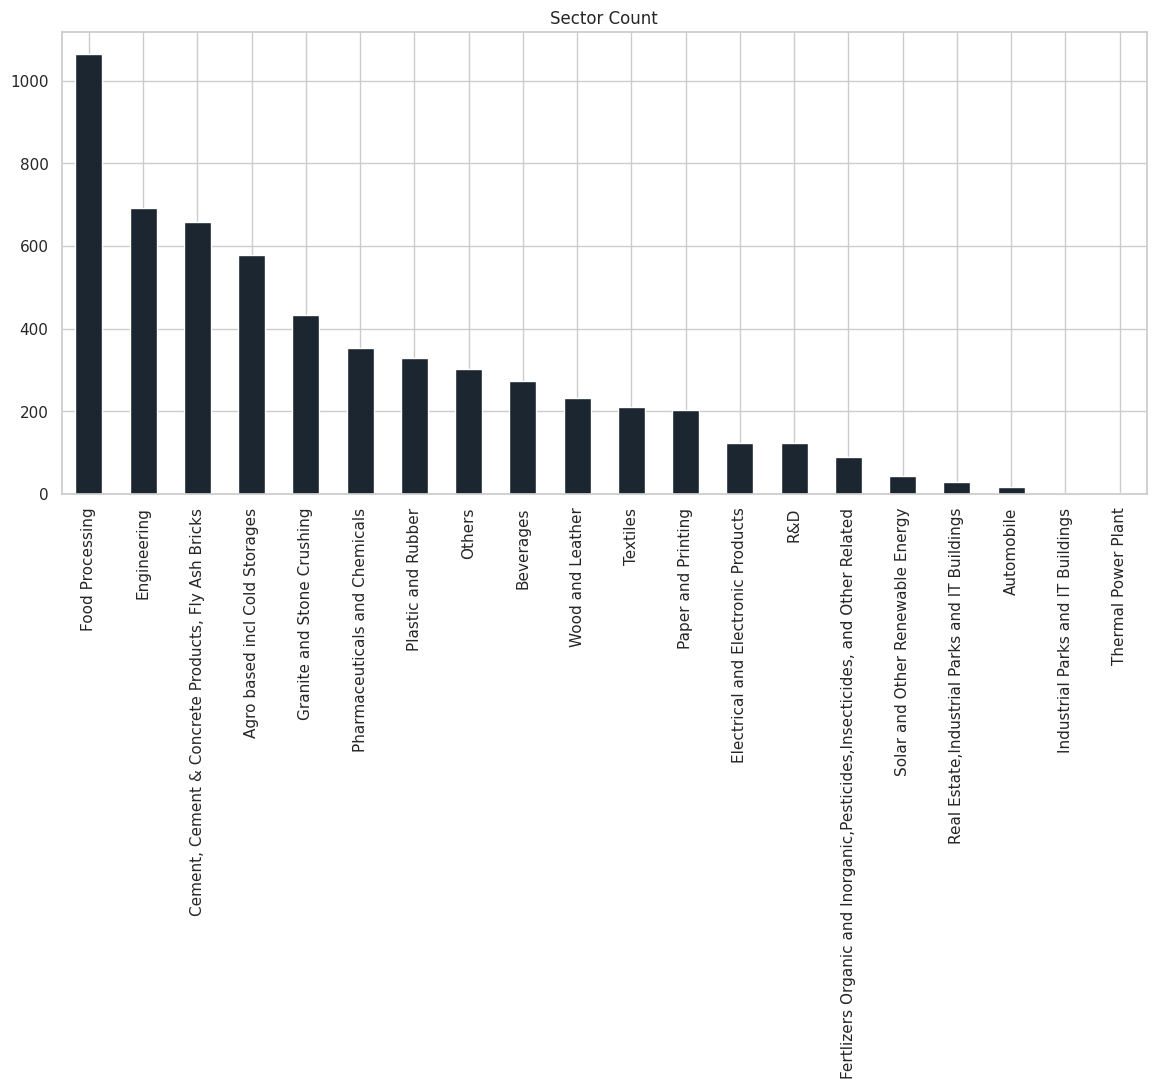

In [ ]:
industries.sector.value_counts().plot(kind='bar', figsize=(14,6),color='#1B2631',title='Sector Count')
plt.show()

*Inference : The Telangana State Industrial Project Approval and Self-Certification System (TS-iPASS), a single-window clearance system for speedy processing of applications, has approved the maximum number of industries in Telangana, with the food processing sector leading the way.*

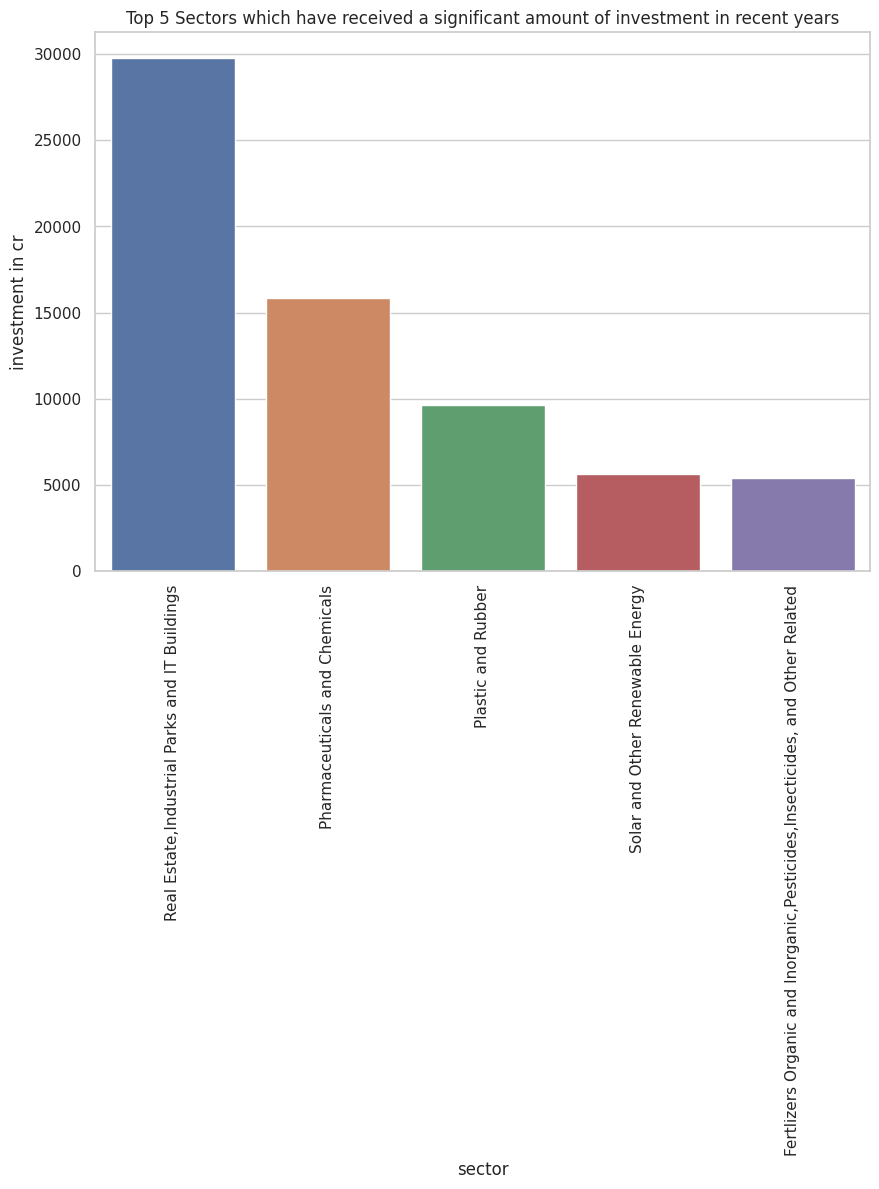

In [ ]:
top_inv =  industries.groupby(['sector'])['investment in cr'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,7))
sns.barplot(data=top_inv[0:5], x='sector', y='investment in cr')
plt.title("Top 5 Sectors which have received a significant amount of investment in recent years")
plt.xticks(rotation=90)
plt.show()

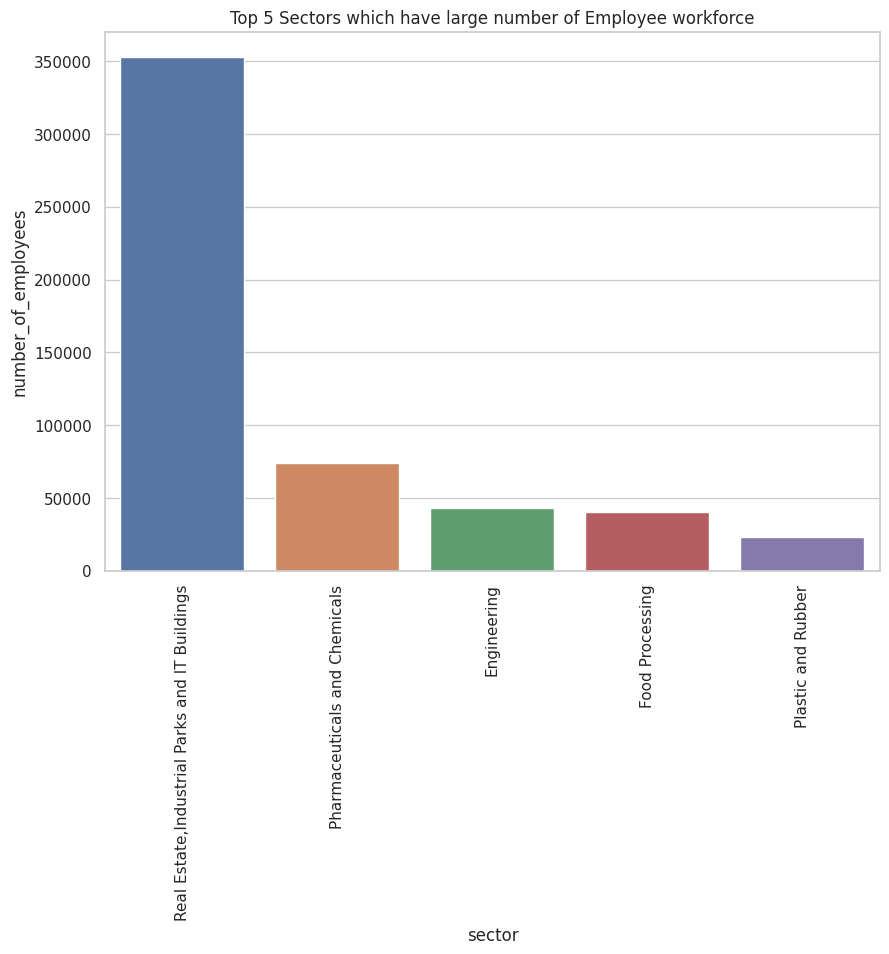

In [ ]:
top_emp = industries.groupby(['sector'])['number_of_employees'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,7))
sns.barplot(data=top_emp[0:5], x='sector', y='number_of_employees')
plt.title("Top 5 Sectors which have large number of Employee workforce")
plt.xticks(rotation=90)
plt.show()

**District-Level Analysis**

In [ ]:
dis = industries.district.value_counts().reset_index()
dis.rename(columns={'index': 'district', 'district':'total'}, inplace=True)


dis['district'] = dis['district'].astype(str)
merged_d = gdf.merge(dis, on=['district'])


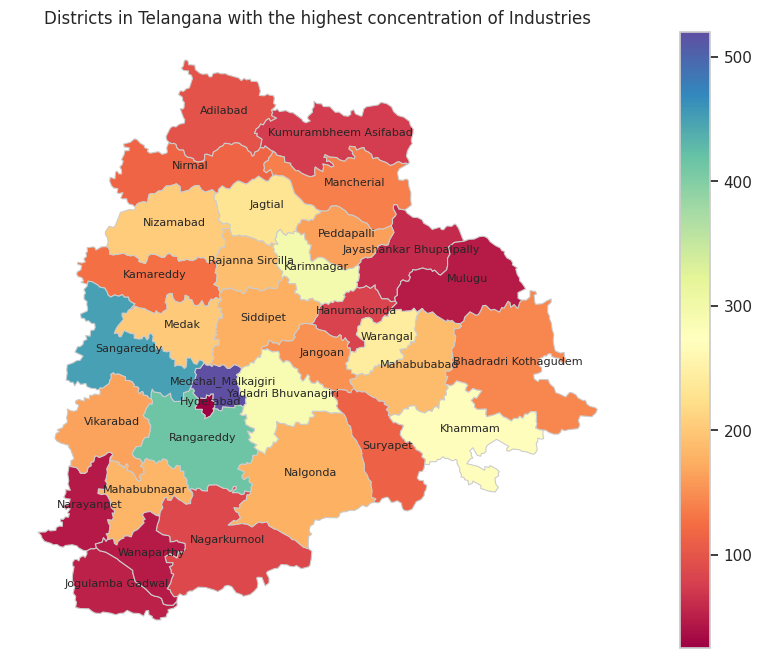

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
merged_d.plot(column='total', cmap='Spectral', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
for idx, row in merged_d.iterrows():
    ax.annotate(text=row['district'], xy=row['geometry'].centroid.coords[0],
                xytext=(3, 3), textcoords='offset points', fontsize=8, ha='center', va='center')

ax.set_title('Districts in Telangana with the highest concentration of Industries')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.axis('off')
plt.show()

*Inference : The districts of Sangareddy, Rangareddy, and Medchal Malkajgiri are all home to many industries, as can be seen on our map.*

In [ ]:
emp_count = industries.groupby('district')['number_of_employees'].sum().sort_values(ascending=False).reset_index()
merged_emp = gdf.merge(emp_count, on=['district'])

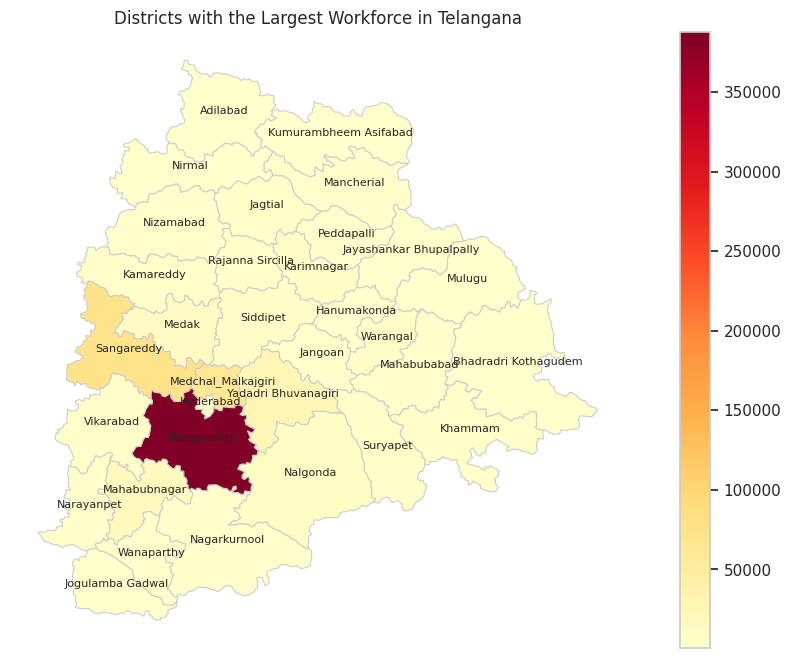

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
merged_emp.plot(column='number_of_employees', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
for idx, row in merged_emp.iterrows():
    ax.annotate(text=row['district'], xy=row['geometry'].centroid.coords[0],
                xytext=(3, 3), textcoords='offset points', fontsize=8, ha='center', va='center')

ax.set_title('Districts with the Largest Workforce in Telangana')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.axis('off')
plt.show()

*Inference : Telangana's Rangareddy district has the highest number of employees.*

In [ ]:
dis_inv = industries.groupby('district')['investment in cr'].sum().reset_index()
dis_invest = gdf.merge(dis_inv, on=['district'])

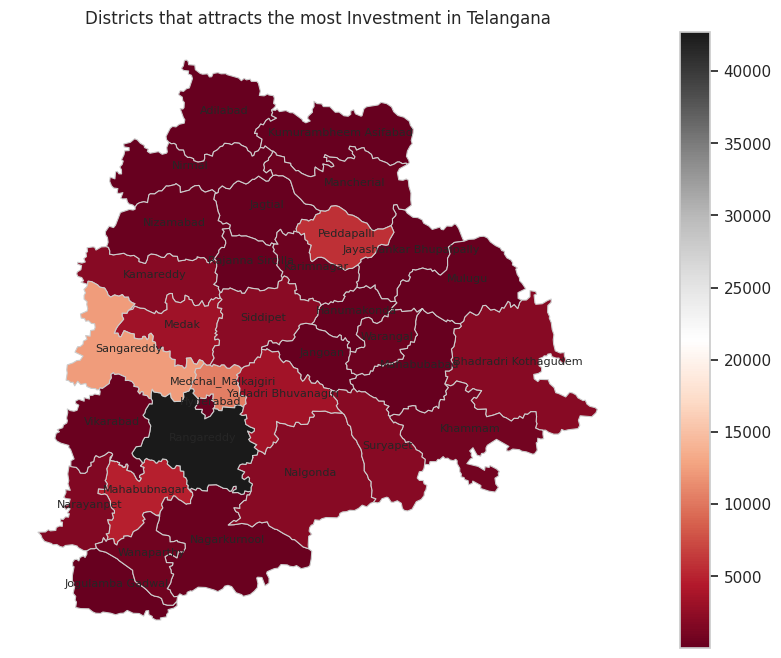

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))
dis_invest.plot(column='investment in cr', cmap='RdGy', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
for idx, row in dis_invest.iterrows():
    ax.annotate(text=row['district'], xy=row['geometry'].centroid.coords[0],
                xytext=(3, 3), textcoords='offset points', fontsize=8, ha='center', va='center')

ax.set_title('Districts that attracts the most Investment in Telangana')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.axis('off')
plt.show()

*Inference : Rangareddy district has received the most investment*

**Investment Analysis**

In [ ]:
ind_invest = industries.groupby(['district','month_year'])['investment in cr'].sum().reset_index()
fig = px.line(ind_invest, x="month_year", y="investment in cr", color='district')
fig.update_layout(title='Investment patterns by Districts')
fig.show()

*Inference : We are watching the top three districts in Telangana for investment, which are Rangareddy, Medchal Malkajgiri, and Rangareddy. Rangareddy received a large amount of investment in January 2020. However, the investment in Rangareddy decreased sharply in January 2021. The COVID-19 lockdown caused a slowdown in economic activity and May be the reason which led to a decline in investment in Rangareddy in January 2021. There was a surge of investment in Pedpalli district in early 2019, but the momentum slowed down before 2020. The investment climate in Medchal Malkajgiri district was favorable in early 2022, but it deteriorated afterwards. Overall, the investment trend shows a decline after January 2021, compared to the investment levels in January 2020.*

In [ ]:
sec_invest = industries.groupby(['sector','month_year'])['investment in cr'].sum().reset_index()

sec_invest['sector'] = sec_invest['sector'].replace({'Fertlizers Organic and Inorganic,Pesticides,Insecticides, and Other Related': 'FO&I,P,In&Or',
                                                    'Cement, Cement & Concrete Products, Fly Ash Bricks': 'C,C&CP,F A B'})

fig = px.line(sec_invest, x="month_year", y="investment in cr", color='sector')
fig.update_layout(title='Investment Trends by Sector')
fig.show()

*Inference: Real Estate,Industrial Parks and IT Buildings were a major investment sector in 2020, but the investment in this sector has been declining rapidly since then. The investment in the Pharmaceuticals and Chemicals sector showed an increasing trend after 2020, and it remained high in 2021. However, there has not been a lot of investment in this sector since January 2022. The investment momentum in Solar and Other Renewable Energy slowed down after January 2020. The Plastic and Rubber industry is on the upswing after the January 2020 dip*

**Sector Performance**

In [ ]:
ind_emp = industries.groupby(['district','month_year'])['number_of_employees'].sum().reset_index()
fig = px.line(ind_emp, x="month_year", y="number_of_employees", color='district')
fig.update_layout(title='Employee count patterns by Districts')
fig.show()

*Inference : The number of employees in the industries in Rangareddy is decreasing slowly, despite the fact that the district has attracted a lot of investment has maximum number of industries. The number of jobs is decreasing slowly. There has been no significant growth in the number of employees since 2021*

In [ ]:
sector_investment = industries.groupby('sector')['investment in cr'].sum()

result = []
for sector in sector_investment.index:
    district_count = industries[industries['sector'] == sector]['district'].nunique()
    if district_count > 1:
        result.append({'sector':sector, 'district_count': district_count})

district_df = pd.DataFrame(result)
fig = px.pie(district_df, values='district_count', names='sector', title='Sectors with Substantial Investment in Multiple Districts')
fig.show()

*Inference : Agro based incl Cold Storages, Food Processing, Plastic and Rubber, Others,Cement, Cement & Concrete Products, Fly Ash Bricks these sectors that are found in most of the districts of Telangana*

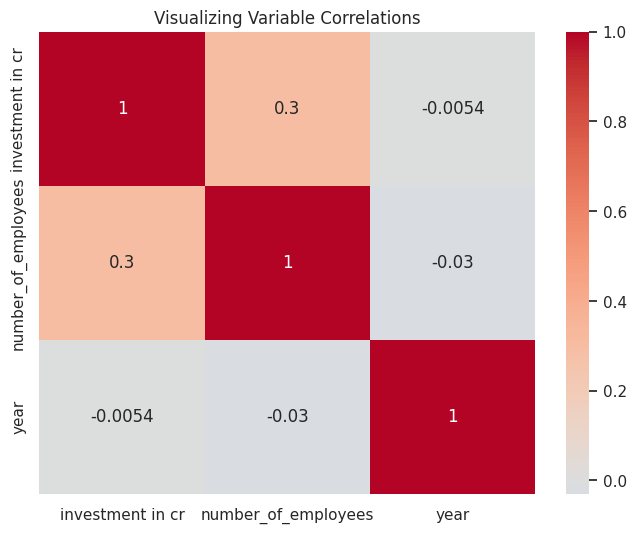

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(industries.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Visualizing Variable Correlations")
plt.show()

*Inference : A correlation coefficient of 0.3 suggests that there is a noticeable but not strong linear relationship between 'investment' and 'number_of_employees'.*

#### **Anlysis of relationship between district investments, vehicles sales and stamps revenue**

In [ ]:
## Merge datasets using the common columns
dfs_dft = dfs.merge(dft, on=['dist_code', 'district', 'date', 'year', 'month'], how='inner')
merged_final = dfs_dft.merge(industries, on=['dist_code', 'district', 'date', 'year', 'month'], how='inner')

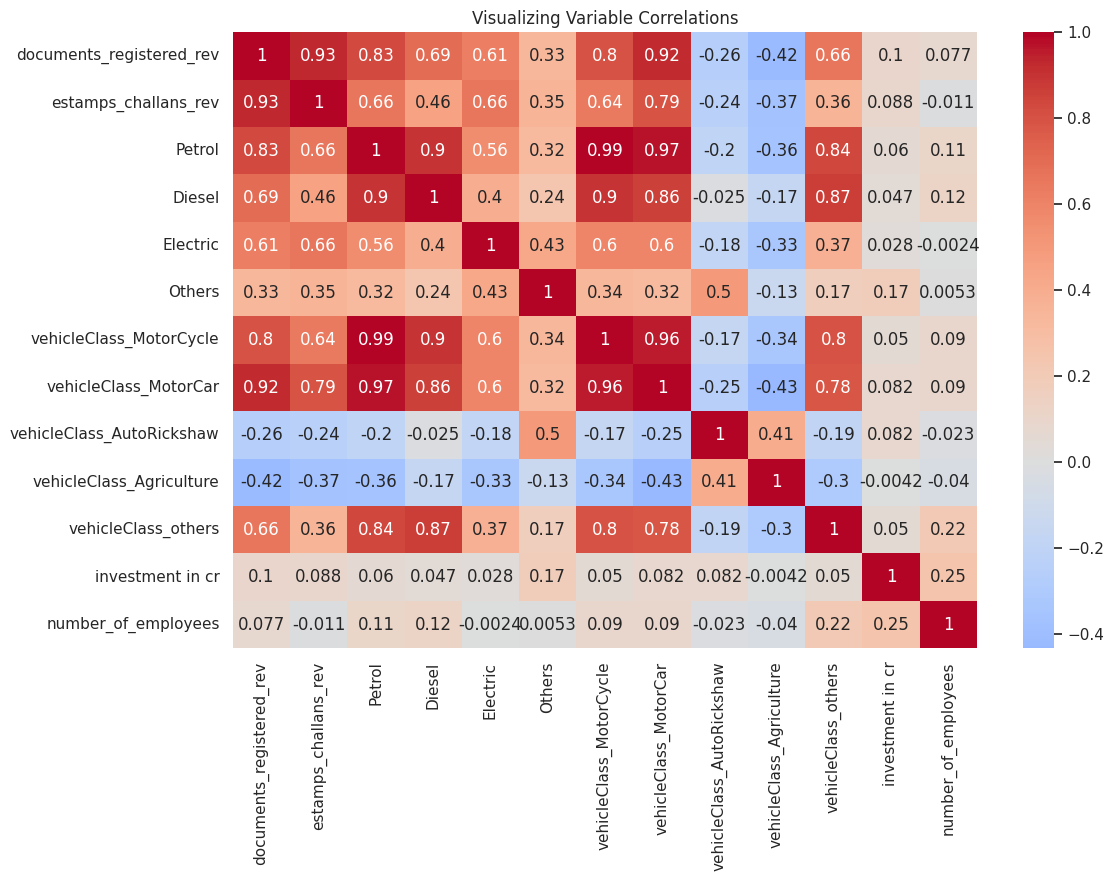

In [ ]:
selected_vars = ['documents_registered_rev','estamps_challans_rev','Petrol', 'Diesel',
       'Electric', 'Others','vehicleClass_MotorCycle',
       'vehicleClass_MotorCar', 'vehicleClass_AutoRickshaw',
       'vehicleClass_Agriculture', 'vehicleClass_others','investment in cr',
       'number_of_employees' ]


selected_df = merged_final[selected_vars]

plt.figure(figsize=(12, 8))
sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Visualizing Variable Correlations")
plt.show()

*Inference :  'investment_in_cr' suggests a weak or inverse relationship with other variables. The investment variable does not affect the other variables in the correlation analysis, and the other variables do not affect the investment variable. This finding suggests that the investment variable is not a major driver of the revenue streams in districts. Other factors, such as the economic conditions, the government policies, and the business environment, are likely to have a more significant impact on the revenue streams in districts.  It is possible that there is a relationship that is not statistically significant*

#### **Insights**

* The top 5 sectors in terms of the number of industries are Food Processing, Engineering, Cement, Cement and Concrete Products, Fly Ash Bricks, Agro based industries (including cold storages), and Granite and Stone Crushing.

* The top 5 following sectors have received the maximum investment is Real Estate,Industrial Parks and IT Buildings, Pharmaceuticals and Chemicals, Plastic and Rubber, Solar and Other Renewable Energy, Fertlizers Organic and Inorganic,Pesticides,Insecticides, and Other Related

* The bulk of employees are employed in these sectors Real Estate,Industrial Parks and IT Buildings, Pharmaceuticals and Chemicals, Engineering, Food Processing, Plastic and Rubber. The sector with the largest number of employees is real estate, industrial parks, and IT buildings, with around 352,558 employees. which is about 52% of the total workforce in the state.

* The real estate sector in Telangana is booming, due to the state's growing population and economy. The industrial parks sector is also growing, as the state attracts new investments in manufacturing and logistics. The IT buildings sector is also expanding, as the state becomes a hub for IT and ITeS companies.

* The districts of Sangareddy, Rangareddy, and Medchal Malkajgiri are all home to many industries. These districts are located in the Greater Hyderabad Metropolitan Area (GHMA), which is a major industrial hub in Telangana. The growth of industries in these districts is expected to create jobs and boost the economy of Telangana.

*  Telangana State Industrial Project Approval and Self-Certification System (TS-iPASS) data, Rangareddy district has the highest number of employees working there, with a total of 3,87,758 employees. This is followed by Sangareddy district with 74,292 employees and Medchal Malkajgiri district with 62,662 employees.

* According to TS-iPASS data, investment in the Automobile Sector has increased since January 2021, indicating that more industries have been set up in this sector.

* There was a continuous increase in investment in Agro based incl Cold Storages Sector from January 2020 to January 2022. However, there has been no investment in this sector since January 2022, and it appears to be declining.

* The investment in more sectors has not increased noticeably after January 2022.

* Sectors not hit due to Corona Pandemic are Agro based incl Cold Storages, Automobile, Beverages, Cement, Cement & Concrete Products, Fly Ash Bricks, Electrical and Electronic Products, Engineering, Solar and Other Renewable Energy, Engineering

* Sectors that have been hit the most due to the Corona Pandemic Fertlizers Organic and Inorganic,Pesticides,Insecticides, and Other Related,  Textiles, Real Estate,Industrial Parks and IT Buildings.


#### Exploration End

## Secondary Research

### The top 5 districts to buy commercial properties in Telangana?
> *The districts of Sangareddy, Rangareddy, Medchal Malkajgiri, Hyderabad and Yadadri Bhuvanagiri. These are top 5 districts in Telangana that are good for investing in commercial property.*

*Resaon : These districts are located in the vicinity of Hyderabad, the capital of Telangana, They are also home to a number of major industries, including IT, manufacturing, and pharmaceuticals. In addition, these districts have a high literacy rate and a skilled workforce. These districts have good infrastructure, including roads, railways, and airports. This makes it easy to transport goods and people to and from these districts. The government is investing in roads, railways, and airports in these districts to improve connectivity. It is also providing incentives to industries to set up shop in these districts. This is expected to further boost the economic growth of these districts in the coming years.*


### Key insights that I believe are worth noting

* *I observed that many districts in the data have a low level of industrialization and poor infrastructure, with the majority of the land used for agriculture.*

* *The data suggests that many districts are heavily reliant on agriculture with a lack of industrial diversification and poor infrastructure.*

* *My analysis of the data also shows that the IT sector has attracted the highest level of investment.*

* *A correlation exists between high taxes and places with good infrastructure and many industries.*

    
### Significant policies or initiatives were put into effect to enhance economic growth, investments, and employment in Telangana by the current government or my recommendations to Telangana government for sustained growth in the next 5 years based on my analysis?
> I will strive to explain this in a clear and concise manner.
  
  * *Industrialization & Infrastructure : Industrialization was a key driver of economic growth, Investing in the development of a strong industrial base is essential for economic growth and prosperity. This includes investing in industries related to the Fourth Industrial Revolution, such as artificial intelligence (AI), Robotics. Industrialization creates jobs, increases productivity, and boosts economic output. It also leads to technological advancements, which can further drive economic growth. Additionally, industrialization can help to reduce a Telangana dependence on agriculture, which can be vulnerable to external factors such as weather and climate change. Continue to invest in infrastructure development, especially in transportation networks, including road, rail, and air connectivity. Well-developed infrastructure is vital for economic growth and attracting businesses.*

* *Agricultural Reforms & Advancement : Agriculture was the backbone of the Telangana economy, employing a significant portion of the population. Land redistribution and ensuring that marginalized communities had access to land it will promote economic equity and reducing poverty in state, Promote the adoption of modern farming techniques, including precision agriculture, drip irrigation, and greenhouse farming. These methods can increase crop yields and reduce resource wastage.*

* *Education and Skills : Education could break the cycle of poverty. Education and skill development as a means to empower individuals and promote economic growth. The technology sector is thriving. to meet the demands of the growing tech industry The education system and ongoing skill development are essential to meet fourth industrial revolution needs.  A holistic approach to education and skill development is vital to cater to Telangana economic landscape*

* *Financial Inclusion : Access to credit and financial services was crucial to enable individuals and communities to invest in economic activities, start businesses, and participate in the formal economy. This inclusion could help reduce poverty and promote economic growth. Governments and the private sector can work together to promote financial inclusion by developing policies and programs that make it easier for people and businesses to access financial services. This can include things like expanding access to bank accounts, providing microfinance loans, and reducing the cost of financial services.*


#### To put these initiatives into effect in Telangana, several policies and strategies I would recommended :
   **Industrialization & Fourth Industrial Revolution**
   
   *1.Offer tax incentives, subsidies, and grants to attract domestic and foreign investments in industries related to the Fourth Industrial Revolution, such as AI and robotics.*
   
   *2.Establish training centers and programs to develop a skilled workforce capable of operating and advancing technology in these industries.*
   
   *3.Provide grants and funding for research institutions and startups to drive technological advancements and innovation.*

   *4.Continue to invest in infrastructure development, especially in transportation and logistics.*
   
   **Agricultural Reforms & Advancement**
   
   *1.Implement and enforce land redistribution policies to ensure marginalized communities have access to land, promoting economic equity.*
   
   *2.Offer subsidies and support for farmers to adopt modern farming techniques, including precision agriculture and greenhouse farming. Strengthen agricultural extension services to educate farmers about advanced farming practices.*
  
  
 **Education and Skills**

 *Enhance the quality of education at all levels, with a focus on STEM (Science, Technology, Engineering, and Mathematics) subjects to meet the demands of the tech industry.Establish vocational training centers to provide practical skills and promote employability. Foster collaboration between educational institutions and industries to ensure graduates are job-ready.*
   
  **Financial Inclusion**
  
  *1.Promote and support microfinance institutions to provide small loans to individuals and small businesses, especially in rural areas.*
  
  *2.Expand banking services in underserved areas and incentivize the opening of bank accounts to increase financial inclusion.*
  
  *3.Encourage the adoption of digital payment systems and mobile banking to reach remote and unbanked populations.*
  

 ***The Economic development is influenced by a number of factors, such as Land ownership and access, Education, Equal economic opportunities, Access to credit , Industrialization , Social and economic justice , Labor rights , Healthcare, Infrastructure development.***

##### *Thank you for taking the time to review this analysis. Your consideration is greatly appreciated*